<font color=#EEAA11> Midterm project: CSME 830</font>

In [2]:
#%pip install opendatasets --upgrade --quiet
#importing pandas is a Python library for working with datasets
import pandas as pd
#to help download the dataset
import os
#to help open the dataset from Kaggle
import opendatasets as od
#scipy.stats - a module that contains a large number of probability distributions, and many statistical functions
#import zscore - allows you to calculate the zscore relative to the sample mean and standard deviation
from scipy.stats import zscore
#numpy - Python library - np: numerical python
import numpy as np
#matplotlip.pyplot -  a collection of functions that allows you to make plots like MATLAB using Python
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import seaborn as sns
from scipy import stats

In [3]:
#IDA Step 1: Data collection and importation -> import dataset -> DANCE DATASET

# Assign the Kaggle data set URL into variable
dataset = 'https://www.kaggle.com/datasets/melissamonfared/dances/discussion/518578'
# Using opendatasets let's download the data sets
od.download(dataset, force=True)
#kaggle datasets download -d melissamonfared/dances
data_dir = './dances'
os.listdir(data_dir)
#encoding='latin-1' - helps solve the error: UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf1 in position 41293: invalid continuation byte
df = pd.read_csv('/Users/kendallandrews/Downloads/dances/dance data.csv', encoding='latin-1')
df

Dataset URL: https://www.kaggle.com/datasets/melissamonfared/dances


100%|██████████| 22.2k/22.2k [00:00<00:00, 2.93MB/s]

,Dance Type,Dance style,Origin,Time Period,Cultural Significance,Notable Characteristics,Instrumental,Hardness Ratio,Dance Formation,Costume,Tempo (BPM),Famous Practitioners,Events and Festivals,Modern Adaptations,Associated Music Genre,Learning Difficulty,Health Benefits,Age Group
0,American,fella shake,United States,Contemporary,It is a Popular dance style in the United Stat...,Fella shake dance is a rhythmic and lively dan...,Electronic instruments,0.7,Circle,Street clothes,120,Richard Rocket,Michigan Fella Shake Competition,The fella shake dance has seen some evolution ...,Hip hop,Easy,"Improved cardiovascular health, Improved flexi...",Teens and young adults
1,American,tap dancing,United States,20th century,Tap dancing is a style of dance that developed...,"Intricate footwork, syncopated rhythms, and rh...","Drums, Guitar, Electronic instruments, and Tra...",0.5,Partner,Street clothes,120,"Bojangles, Fred Astaire, Gene Kelly","Apollo Theater, Motown, Budapest","In the contemporary times, tap dancing has evo...",Hip hop,Easy,"Improved cardiovascular health, Stress relief,...",All ages
2,American,fella fella fella Im 100% fella,United States,Modern,The Mambo is a Popular dance style that origin...,The Mambo is a Popular dance style that origin...,"Drums, Guitar, Electronic instruments, Traditi...",0.5,Line,Street clothes,120,"Fella Makafui, Medikal, Sarkodie",No major events or festivals.,Some contemporary Mambo performances are highl...,Latin,Moderate,"Stress relief, Improved flexibility, Improved ...",Teens and young adults
3,American,Stepping,United States,20th century,Stepping was a Popular activity for African Am...,"Acrobatic footwork, improvisation, and call an...","Drums, Type: Instrument",1.0,Line,Street clothes,125,"Michael Jackson, Alpha Phi Alpha",No major events or festivals.,Stepping has evolved over time with new moves ...,Hip hop,Moderate,"Stress relief, Improved posture, and Increased...",Teens and young adults
4,American,Jazz,United States,20th century,The Charleston dance is a Popular dance that o...,"Rhythmic movements, hip-shaking, knee-bending, sc","Electronic instruments, Guitar, Drums",1.0,Line,Street clothes,180,"Jack Cole, Bob Fosse, Matt Mattox, Chita Rivera",Burn the Floor - The International Ballroom Co...,The Charleston dance has evolved and adapted i...,Jazz,Easy,Improved cardiovascular health,All ages
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,Other,KPop,Korea,Contemporary,KPop dance is a quintessential part of Korean ...,KPop dances are known for their synchronized m...,Electronic instruments,1.0,Line,Street clothes,130,"BoA, Lee Hyori, Taemin",KCON,KPop dance has evolved and adapted over the ye...,Pop,Easy,"Improved cardiovascular health, link:",Teens and young adults
202,Other,Liturgical dance,United States,20th century,Liturgical dance is dance that is performed in...,"Acrobatic movements, intricate footwork, and r...",Guitar,0.5,Circle,Street clothes,80,"Judith Jamison, Katherine Dunham",National Liturgical Dance Conference and Festival,Liturgical dance has evolved and adapted in co...,Hip hop,Moderate,"Improved cardiovascular health, Stress relief,...",Children and Adults
203,Other,Lyrical dance,United States,20th century,The origins of lyrical dance are difficult to ...,"Acrobatic movements, intricate footwork, and r...","Drums, Guitar, Electronic instruments",2.0,Partner,Street clothes,150,"Travis Wall, Mia Michaels, Tessandra Chavez",International Ballet Competition,Lyrical dance has evolved and been adapted in ...,Pop,Moderate,"Improved cardiovascular health, stress relief,...",All ages
204,Other,Pole dance,United States,20th century,It provides an opportunity for people to expre...,"acrobatic movements, intricate footwork, and r...",Electronic instruments,1.3,Solo,Street clothes,150,Julian Garner,Rockstar Energy Mayhem Festival,Pole dancing has become Popular in recent year...,Hip hop,Hard,"Improved cardiovascular health, Stress relief,...",All 

In [4]:
#IDA Step 1: Data collection and importation -> import dataset -> CALORIES DATASET

dataset2 = 'https://www.kaggle.com/datasets/aadhavvignesh/calories-burned-during-exercise-and-activities/discussion/144014'
od.download(dataset2, force=True)
data_dir2 = './calories-burned-during-exercise-and-activities'
os.listdir(data_dir2)
df2 = pd.read_csv("/Users/kendallandrews/Downloads/calories-burned-during-exercise-and-activities/exercise_dataset.csv")
df2

Dataset URL: https://www.kaggle.com/datasets/aadhavvignesh/calories-burned-during-exercise-and-activities


100%|██████████| 3.65k/3.65k [00:00<00:00, 375kB/s]

,"Activity, Exercise or Sport (1 hour)",130 lb,155 lb,180 lb,205 lb,Calories per kg
0,"Cycling, mountain bike, bmx",502,598,695,791,1.750730
1,"Cycling, <10 mph, leisure bicycling",236,281,327,372,0.823236
2,"Cycling, >20 mph, racing",944,1126,1308,1489,3.294974
3,"Cycling, 10-11.9 mph, light",354,422,490,558,1.234853
4,"Cycling, 12-13.9 mph, moderate",472,563,654,745,1.647825
...,...,...,...,...,...,...
243,General cleaning,207,246,286,326,0.721008
244,"Cleaning, dusting",148,176,204,233,0.515199
245,Taking out trash,177,211,245,279,0.617427
246,"Walking, pushing a wheelchair",236,281,327,372,0.823236


In [5]:
#IDA Step 2: Data cleaning and preprocessing - Handle missing values - Remove duplicates - Correct data types - Standardize formats
#DANCE

#identify missing values
for i in df.isnull().sum():
    if i > 0:
        print(df.isnull().sum())
    else:
        pass
#no missing values

#identify duplicates
duplicate_rows = df.duplicated()

# print duplicate rows
for i in duplicate_rows:
    if i == True:
        print(duplicate_rows)
    else:
        pass
#no duplicates

#Correct data types
df.dtypes
#hardness = float (0.5, 0.7, 1.0, 1.3, 1.5, 2.0) (CHECK)
df["Hardness Ratio"]
#tempo (bpm) = int (80,120,125,130,150,180) (CHECK)
df["Tempo (BPM)"]
#dance style - object (fella shake, tap dancing, stepping, jazz, moonwalk, ballet, dougie, hip hop dance, catdaddy, jerkin, popping, litefeet, house dance, locking, krumping, kpop, lyrical, pole dance, etc.)
#keep as objects/strings - names of the dances (CHECK)
df["Dance style"] 
#health benefits - object (Improved cardiovascular health, Stress relief, improved physical health, Increased self-esteem, Improved social skills, Improved flexibility, etc.)
#can count the number of benefits to make the column numerical (CHECK)
df["Health Benefits"]
df["health_count"] = df["Health Benefits"].str.split(",").apply(len)
print(df[["Health Benefits", "health_count"]])

#learning difficulty - object (easy, moderate, hard) - can change to numerical (CHECK)
from sklearn.preprocessing import OrdinalEncoder
#LabelEncoder, OneHotEncode
oe = OrdinalEncoder(categories=[[ 'Very easy','Easy', 'Moderate', 'Hard', 'Difficult']])
df['difficulty'] = oe.fit_transform(df[['Learning Difficulty']])
print(df[['Learning Difficulty', 'difficulty']])

#ages - object (all ages, teens and young adults, Adults, children and adults) - can change to numerical (CHECK)
#not sure if age is relevant yet
df["Age Group"]
# replace error in age column to the correct label
df['Age Group'].replace('574]: All ages]', 'All ages', inplace=True)
#'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)'
oe = OrdinalEncoder(categories=[['Children','Teens and young adults', 'Children and Adults', 'Teens and young adults, Adults','Adults', 'All ages']])
df['ages'] = oe.fit_transform(df[['Age Group']])
print(df[['Age Group', 'ages']])

#df.columns
'''
['Dance Type', 'Dance style', 'Origin', 'Time Period',
       'Cultural Significance', 'Notable Characteristics', 'Instrumental',
       'Hardness Ratio', 'Dance Formation', 'Costume', 'Tempo (BPM)',
       'Famous Practitioners', 'Events and Festivals', 'Modern Adaptations',
       'Associated Music Genre', 'Learning Difficulty', 'Health Benefits',
       'Age Group']

'''
#Standardize formats
numeric_cols_df = df.select_dtypes(include=[np.number]).columns
z1= df[numeric_cols_df].apply(zscore)
print(z1)

                                       Health Benefits  health_count
0    Improved cardiovascular health, Improved flexi...             3
1    Improved cardiovascular health, Stress relief,...             3
2    Stress relief, Improved flexibility, Improved ...             3
3    Stress relief, Improved posture, and Increased...             3
4                       Improved cardiovascular health             1
..                                                 ...           ...
201              Improved cardiovascular health, link:             2
202  Improved cardiovascular health, Stress relief,...             3
203  Improved cardiovascular health, stress relief,...             3
204  Improved cardiovascular health, Stress relief,...             3
205        Stress relief and improved physical health.             1

[206 rows x 2 columns]
    Learning Difficulty  difficulty
0                  Easy         1.0
1                  Easy         1.0
2              Moderate         2.0
3   

/var/folders/zz/3b4b_cj17rgb4t357254xqqc0000gp/T/ipykernel_2702/1854769715.py:49: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age Group'].replace('574]: All ages]', 'All ages', inplace=True)


In [16]:
#Goal is to slice the strings apart and place each health benefit as its own variable
#print(df['Health Benefits'])

# Slice the 'Name' column to the first 5 characters
#repl = df['Health Benefits'].replace(' and','')
#print(repl[1])
slice = df['Health Benefits'].str.split(",")

#slice = slice.replace(' and ', '')

  
# storing dtype before operation 
#dtype_before = type(df['Health Benefits']) 
dtype_before2 = type(slice)
#print(df['Health Benefits'][1])
#print(slice)
#print(dtype_before2)
my_list = slice.tolist()
dtype_after = type(my_list)
#print(dtype_after)
print(my_list)

#Create an empty list of each health benefit
#If the health benefit is prevalent in that dance add a 1 to the list 'health benefit' if not add a 0
Improved_cardiovascular_health = []
for i in range(len(my_list)):
    if 'Improved cardiovascular health' in my_list[i]:
        Improved_cardiovascular_health.append(1)
    elif 'Improved cardiov' in my_list[i]:
        Improved_cardiovascular_health.append(1)
    elif 'Improved cardiovascular health and increased physical fitness' in my_list[i]:
        Improved_cardiovascular_health.append(1)
    elif 'Cardiovascular health' in my_list[i]:
        Improved_cardiovascular_health.append(1)
    elif 'Positive effects on cardiovascular health' in my_list[i]:
        Improved_cardiovascular_health.append(1)
    elif 'Moderate cardiovascular workout' in my_list[i]:
        Improved_cardiovascular_health.append(1)
    elif ' such as improved cardiovascular' in my_list[i]:
        Improved_cardiovascular_health.append(1)
    else:
        Improved_cardiovascular_health.append(0)
print(Improved_cardiovascular_health)

Improved_flexibility = []
for i in range(len(my_list)):
    if " Improved flexibility" in my_list[i]:
        Improved_flexibility.append(1)
    elif " and Improved flexibility." in my_list[i]:
        Improved_flexibility.append(1)
    elif ' and Improved flexibility' in my_list[i]:
        Improved_flexibility.append(1)
    elif " and improved flexibility" in my_list[i]:
        Improved_flexibility.append(1)
    elif 'Improved flexibility and strength' in my_list[i]:
        Improved_flexibility.append(1)
    elif 'Improved strength and flexibility' in my_list[i]:
        Improved_flexibility.append(1)
    elif ' Flexibility' in my_list[i]:
        Improved_flexibility.append(1)
    else:
        Improved_flexibility.append(0)
print(Improved_flexibility)

Stress_relief = []
for i in range(len(my_list)):
    if " Stress relief" in my_list[i]:
        Stress_relief.append(1)
    elif "Stress relief" in my_list[i]:
        Stress_relief.append(1)
    elif ' stress relief' in my_list[i]:
        Stress_relief.append(1)
    elif 'Reduces stress' in my_list[i]:
        Stress_relief.append(1)
    elif 'Stress relief and improved mood' in my_list[i]:
        Stress_relief.append(1)
    elif 'Reduces stress and anxiety'  in my_list[i]:
        Stress_relief.append(1)
    else:
        Stress_relief.append(0)
print(Stress_relief)

#added to cerebellum
Improved_posture = []
for i in range(len(my_list)):
    if " Improved posture" in my_list[i]:
        Improved_posture.append(1)
    elif "Improved posture" in my_list[i]:
        Improved_posture.append(1)
    else:
        Improved_posture.append(0)
print(Improved_posture)

confidence = []
for i in range(len(my_list)):
    if " and Increased self-confidence" in my_list[i]:
        confidence.append(1)
    elif " Increased self-confidence" in my_list[i]:
        confidence.append(1)
    elif "Increased self-confidence" in my_list[i]:
        confidence.append(1)
    elif ' Improved self-confidence' in my_list[i]:
        confidence.append(1)
    elif ' Increased self-esteem' in my_list[i]:
        confidence.append(1)
    elif ' and Increased self-' in my_list[i]:
        confidence.append(1)
    else:
        confidence.append(0)
print(confidence)

physical_fitness = []
for i in range(len(my_list)):
    if " and increased physical fitness" in my_list[i]:
        physical_fitness.append(1)
    elif " Increased physical fitness" in my_list[i]:
        physical_fitness.append(1)
    elif "Improved physical fitness" in my_list[i]:
        physical_fitness.append(1)
    elif " Improved physical fitness" in my_list[i]:
        physical_fitness.append(1)
    elif '  Increased physical activity' in my_list[i]:
        physical_fitness.append(1)
    elif ' and Muscle' in my_list[i]:
        physical_fitness.append(1)
    elif ' Enhanced physical fitness' in my_list[i]:
        physical_fitness.append(1)
    elif ' Weight loss' in my_list[i]:
        physical_fitness.append(1)
    elif ' Burning calories and losing' in my_list[i]:
        physical_fitness.append(1)
    elif 'Potential physical or mental health benefits associated with performing the dance. This describes' in my_list[i]:
        physical_fitness.append(1)
    elif 'Increased physical activity and exercise' in my_list[i]:
        physical_fitness.append(1)
    else:
        physical_fitness.append(0)
print(physical_fitness)

social_connection = []
for i in range(len(my_list)):
    if " and Social connection" in my_list[i]:
        social_connection.append(1)
    elif "Social connection" in my_list[i]:
        social_connection.append(1)
    elif " Social connections" in my_list[i]:
        social_connection.append(1)
    elif " and social connection" in my_list[i]:
        social_connection.append(1)
    elif ' and Improved social skills' in my_list[i]:
        social_connection.append(1)
    else:
        social_connection.append(0)
print(social_connection)

mental_health = []
for i in range(len(my_list)):
    if " and improves mental health" in my_list[i]:
        mental_health.append(1)
    elif "Improves mental health" in my_list[i]:
        mental_health.append(1)
    elif " Improves mental health" in my_list[i]:
        mental_health.append(1)
    elif 'Reduces stress and improves mental health' in my_list[i]:
        mental_health.append(1)
    elif 'Dancing can offer physical and mental health benefits' in my_list[i]:
        mental_health.append(1)
    elif 'The Zapateado dance has the potential to offer numerous physical and mental health' in my_list[i]:
        mental_health.append(1)
    elif 'Potential physical or mental health benefits associated with performing the dance. This describes' in my_list[i]:
        mental_health.append(1)
    elif 'potential_physical_mental_health_benefits' in my_list[i]:
        mental_health.append(1)
    else:
        mental_health.append(0)
print(mental_health)

strength = []
for i in range(len(my_list)):
    if "Improved flexibility and strength" in my_list[i]:
        strength.append(1)
    elif "Improved strength and flexibility" in my_list[i]:
        strength.append(1)
    else:
        strength.append(0)
print(strength)

community = []
for i in range(len(my_list)):
    if " A sense of community and belonging" in my_list[i]:
        community.append(1)
    else:
        community.append(0)
print(community)

boost = []
for i in range(len(my_list)):
    if " Boost" in my_list[i]:
        boost.append(1)
    elif "Boost" in my_list[i]:
        boost.append(1)
    elif 'Stress relief and improved mood' in my_list[i]:
        boost.append(1)
    elif ' Boosted mood'in my_list[i]:
        boost.append(1)
    elif ' and Increased energy' in my_list[i]:
        boost.append(1)
    elif ' Increased energy levels' in my_list[i]:
        boost.append(1)
    elif '55]: Increased happiness and well-being'in my_list[i]:
        boost.append(1)
    else:
        boost.append(0)
print(boost)

cerebellum = []
for i in range(len(my_list)):
    if " Improved balance" in my_list[i]:
        cerebellum.append(1)
    elif "Improved balance" in my_list[i]:
        cerebellum.append(1)
    elif ' and improved coordination' in my_list[i]:
        cerebellum.append(1)
    elif ' Improved coordination' in my_list[i]:
        cerebellum.append(1)
    elif ' Improved balance and coordination' in my_list[i]:
        cerebellum.append(1)
    elif ' Improved cognitive function' in my_list[i]:
        cerebellum.append(1)
    elif ' Improved posture' in my_list[i]:
        cerebellum.append(1)
    elif ' Improved balance and' in my_list[i]:
        cerebellum.append(1)
    elif ' Improved balance and coord' in my_list[i]:
        cerebellum.append(1)
    elif ' Improved posture' in my_list[i]:
        cerebellum.append(1)
    elif 'Improved posture' in my_list[i]:
        cerebellum.append(1)
    else:
        cerebellum.append(0)
print(cerebellum)

#Create a matrix for each health benefit
health_benefits_matrix = pd.DataFrame([Improved_cardiovascular_health, Improved_flexibility, Stress_relief, confidence, physical_fitness,social_connection, mental_health, strength, community, boost, cerebellum])
#print(type(health_benefits_matrix))
health_benefits_matrix = health_benefits_matrix.transpose()
print(health_benefits_matrix)
print(len(health_benefits_matrix))
print(len(df['Dance style']))
    

health_benefits_names = ['Improved cardiovascular health','Improved flexibility','Stress relief','confidence','physical_fitness','social_connection','mental_health','strength','community','boost','cerebellum']
dict_list = []
for i in range(len(health_benefits_matrix)):
    if i < len(df) and i < len(health_benefits_matrix):
    #data = {health_benefits_names[i]: health_benefits_matrix[i][x]}
     if health_benefits_matrix[i][0] == 1:
        data = {health_benefits_names[0]: df["Dance style"][i]}
        dict_list.append(data)
        #benefits = pd.DataFrame.from_dict(dict_list)
     elif health_benefits_matrix[i][1] == 1:
        data = {health_benefits_names[1]: df["Dance style"][i]}
        dict_list.append(data)
        #benefits = pd.DataFrame.from_dict(dict_list)
     elif health_benefits_matrix[i][2] == 1:
        data = {health_benefits_names[2]: df["Dance style"][i]}
        dict_list.append(data)
        #benefits = pd.DataFrame.from_dict(dict_list)
     elif health_benefits_matrix[i][3] == 1:
        data = {health_benefits_names[3]: df["Dance style"][i]}
        dict_list.append(data)
        #benefits = pd.DataFrame.from_dict(dict_list)
     elif health_benefits_matrix[i][4] == 1:
        data = {health_benefits_names[4]: df["Dance style"][i]}
        dict_list.append(data)
       # benefits = pd.DataFrame.from_dict(dict_list)
     elif health_benefits_matrix[i][5] == 1:
        data = {health_benefits_names[5]: df["Dance style"][i]}
        dict_list.append(data)
        #benefits = pd.DataFrame.from_dict(dict_list)
     elif health_benefits_matrix[i][6] == 1:
        data = {health_benefits_names[6]: df["Dance style"][i]}
        dict_list.append(data)
        #benefits = pd.DataFrame.from_dict(dict_list)
     elif health_benefits_matrix[i][7] == 1:
        data = {health_benefits_names[7]: df["Dance style"][i]}
        dict_list.append(data)
        #benefits = pd.DataFrame.from_dict(dict_list)
     elif health_benefits_matrix[i][8] == 1:
        data = {health_benefits_names[8]: df["Dance style"][i]}
        dict_list.append(data)
        #benefits = pd.DataFrame.from_dict(dict_list)
     elif health_benefits_matrix[i][9] == 1:
       data = {health_benefits_names[9]: df["Dance style"][i]}
       dict_list.append(data)
       #benefits = pd.DataFrame.from_dict(dict_list)
     elif health_benefits_matrix[i][10] == 1:
       data = {health_benefits_names[10]: df["Dance style"][i]}
       dict_list.append(data)
       #benefits = pd.DataFrame.from_dict(dict_list)
benefits = pd.DataFrame.from_dict(dict_list)
benefits
'''
dict_list = []
for i in range(len(health_benefits_matrix)):
    for x in range(len(health_benefits_matrix[i])):
        data = {health_benefits_names[i]: health_benefits_matrix[i][x]}
        dict_list.append(data)
        benefits = pd.DataFrame.from_dict(dict_list)
        '''
#print(benefits.head())
#plot this information
#later use this information in streamlit as prompts for the user
'''
def temp_health():
    for i in range(len(df)):
        if i in health_benefits_matrix[i] == 1:
            print(health_benefits_names[i])
'''
'''
for i in range(len(health_benefits_matrix)):
 for (columnName, columnData) in health_benefits_matrix.iteritems():
    if columnName == 1 in columnName[0]:
        print(health_benefits_names[0])
    if columnName == 1 in columnName[1]:
        print(health_benefits_names[1])
    if columnName == 1 in columnName[2]:
        print(health_benefits_names[2])
    if columnName == 1 in columnName[3]:
        print(health_benefits_names[3])
    if columnName == 1 in columnName[4]:
        print(health_benefits_names[4])
    if columnName == 1 in columnName[5]:
        print(health_benefits_names[5])
    if columnName == 1 in columnName[6]:
        print(health_benefits_names[6])
    if columnName == 1 in columnName[7]:
        print(health_benefits_names[7])
    if columnName == 1 in columnName[8]:
        print(health_benefits_names[8])
    if columnName == 1 in columnName[9]:
        print(health_benefits_names[9])
    if columnName == 1 in columnName[10]:
        print(health_benefits_names[10])
    if columnName == 1 in columnName[11]:
        print(health_benefits_names[11])

'''

[['Improved cardiovascular health', ' Improved flexibility', ' Stress relief'], ['Improved cardiovascular health', ' Stress relief', ' and Improved flexibility'], ['Stress relief', ' Improved flexibility', ' Improved cardiovascular health'], ['Stress relief', ' Improved posture', ' and Increased self-confidence'], ['Improved cardiovascular health'], ['potential_physical_mental_health_benefits'], ['Improved cardiovascular health', ' Stress relief', ' and Improved flexibility'], ['Improved cardiov'], ['Improved cardiovascular health and increased physical fitness', ' Stress relief'], ['improved cardiovascular health', ' stress relief', ' and improved flexibility'], ['Improved cardiovascular health', ' Stress relief', ' Improved flexibility'], ['Improved cardiovascular health', ' Stress relief', ' and Improved flexibility'], ['Improved cardiovascular health', ' Stress relief', ' and Improved flexibility'], ['Stress relief', ' Improved cardiovascular health', ' and Improved flexibility.'],

KeyError: 11

In [19]:
benefits

,Improved cardiovascular health,Improved flexibility,Stress relief,confidence,physical_fitness,social_connection,mental_health,strength,community,boost,cerebellum
0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [15]:
#IDA Step 2: Data cleaning and preprocessing - Handle missing values - Remove duplicates - Correct data types - Standardize formats
#CALORIES 

#identify missing values
for i in df2.isnull().sum():
    if i > 0:
        print(df2.isnull().sum())
    else:
        pass
#no missing values

#identify duplicates
duplicate_rows2 = df2.duplicated()

# print duplicate rows
for i in duplicate_rows2:
    if i == True:
        print(duplicate_rows2)
    else:
        pass
#no duplicates

#Correct data types
df2.dtypes
#activity - object - title of exercise/activity (CHECK)
#130 lbs - int (CHECK)
#155 lbs - int (CHECK)
#180 lbs - int (CHECK)
#205 lbs - int (CHECK)
#calories - float (CHECK)

#Columns:
df2.columns
'''
'Activity, Exercise or Sport (1 hour)', '130 lb', '155 lb', '180 lb',
       '205 lb', 'Calories per kg']
'''

#Standardize formats
numeric_cols_df2 = df2.select_dtypes(include=[np.number]).columns
z2 = df2[numeric_cols_df2].apply(zscore)
print(z2)


#####
#Creating a new dataset for calories that only includes the exercise and the calories, only for dance
d3 = df2.drop(['130 lb', '155 lb', '180 lb', '205 lb'], axis=1)
d3
''' 
"Ballet, twist, jazz, tap",266,317,368,419,0.927494089552239
"Ballroom dancing, slow",177,211,245,279,0.61742672238806
"Ballroom dancing, fast",325,387,449,512,1.13262599402985
'''
#d3.head()
#df3 = pd.DataFrame(d3['Ballroom dancing, slow'])
#df3 = pd.DataFrame(d3['Ballroom dancing, fast'])
#df3
print(df2["Activity, Exercise or Sport (1 hour)"][36])
#print(df2["Activity, Exercise or Sport (1 hour)"]["Ballroom dancing, fast"])
d3 = d3.iloc[[29, 34, 35, 36],:]
#print(d3)
print('*********')
print(d3.columns)
numeric_cols_d3 = d3.select_dtypes(include=[np.number]).columns
print(d3['Activity, Exercise or Sport (1 hour)'][29])

       130 lb    155 lb    180 lb    205 lb  Calories per kg
0    0.578463  0.575729  0.577622  0.575973         0.576842
1   -0.792377 -0.793301 -0.790987 -0.792288        -0.792190
2    2.856325  2.856005  2.857396  2.855318         2.856232
3   -0.184260 -0.184363 -0.184783 -0.184898        -0.184620
4    0.423857  0.424574  0.425141  0.425758         0.424950
..        ...       ...       ...       ...              ...
243 -0.941829 -0.944456 -0.943468 -0.942503        -0.943084
244 -1.245887 -1.246765 -1.248429 -1.246198        -1.246869
245 -1.096435 -1.095610 -1.095948 -1.095983        -1.095976
246 -0.792377 -0.793301 -0.790987 -0.792288        -0.792190
247 -0.792377 -0.793301 -0.790987 -0.792288        -0.792190

[248 rows x 5 columns]
Ballroom dancing, fast
*********
Index(['Activity, Exercise or Sport (1 hour)', 'Calories per kg'], dtype='object')
Jazzercise


**IDA Step 3:** Variable identification and classification  - Identify dependent and independent variables -  Classify variables (numeric, categorical, etc.) -  Understand the meaning of each variable</h3>

DANCE DATASET 

Identify dependent and independent variables</h3>

Classify variables</h3>
- real: #'s, ints, floats</h3>
- ordinal: order/ranking</h3>
- category: groups w/ no ranking</h3>


Understand the meaning of each variable</h3>

1. Dance Type - independent - category - general type of dance</h3>
2. Dance style - dependent - category  - the specific dance style</h3>
3. Origin - independent - category - where the county the dance originated from</h3>
4. Time Period - independent - interval - the time period the dance was created in</h3>
5. Cultural Significance - independent - category - the dances' importance/impact from its place of origin </h3>
6. Notable Characteristics - independent - category - the intricate and specific elements of the dance</h3>
7. Instrumental - independent - category - the instruments used for the music the dances usually are perfomed with </h3>
8. Hardness Ratio - dependent - real  - ranking the level on difficulty of the dance</h3>
9. Dance Formation - dependent - category - the usual organization of the dancers when the dance is performed</h3>
10. Costume - dependent - category - what the dancers usually wear when the dance is performed</h3>
11. Tempo (BPM) - dependent - real - the tempo; beats per minute used in the music the dances are usually performed with</h3>
12. Famous Practitioners - dependent - category - famous people who are known for perfoming the specific dance</h3>
13. Events and Festivals - independent - category - locations where the dances are performed at</h3>
14. Modern Adaptations - dependent - category - the evolution/expansion of the certain dance</h3>
15. Associated Music Genre - dependent - category - the category of music the dance is usually performed to</h3>
16. Learning Difficulty - dependent - ordinal - ranking the level of difficulty it is to learn the dance</h3>
17. Health Benefits - dependent - category - the positive health attributes associated with practicing/performing these dances</h3>
18. Age Group - independent - ratio - the certain age range in which the people who participate in these dances usually are</h3>


**IDA Step 3:** Variable identification and classification  - Identify dependent and independent variables -  Classify variables (numeric, categorical, etc.) -  Understand the meaning of each variable</h3>

CALORIES DATASET

Identify dependent and independent variables</h3>

Classify variables</h3>
- ratio: has a true zero point and equal intervals (height, weight, age)</h3>
- category: groups w/ no ranking</h3>

Understand the meaning of each variable</h3>

1. Activity, Exercise or Sport (1 hour) - independent - category - the name of the type of activty, exercise, or sport that led to burning calories</h3>
2. 130 lb - independent - ratio  - This column contains the calories burned by a person weighing 130 lb (58.967 kg)</h3>
3. 155 lb - independent - ratio - This column contains the calories burned by a person weighing 150 lb (70.306 kg)</h3>
4. 180 lb - independent - ratio - This column contains the calories burned by a person weighing 180 lb (81.646 kg)</h3>
5. 205 lb - independent - ratio - This column contains the calories burned by a person weighing 205 lb (92.986 kg) </h3>
6. Calories per kg - dependent - ratio - the number of calories burned from a specific activty, exercise, or sport per kg</h3>



In [8]:
#IDA Step 4. Basic descriptive statistics - - Calculate mean, median, mode - Determine range, variance, standard deviation - Identify minimum and maximum values 

#DANCE DATASET

# - Calculate mean, median, mode 
print("\nMEAN:\n",df[numeric_cols_df].mean())
#MEDIAN
print("\nMEDIAN:\n",df[numeric_cols_df].median())
#MODE
print("\nMODE:\n",df[numeric_cols_df].mode())

# - Determine range, variance, standard deviation | - Identify minimum and maximum values 
#RANGE / MAX and MIN
def range(column):
    m1 = df[column].max()
    m2 = df[column].min()
    range = m1-m2
    print("min:",m1)
    print("max:",m2)
    print("range:",range)

print("\nHardness Ratio")
range("Hardness Ratio")

print("\nTempo (BPM)") 
range("Tempo (BPM)")  

print("\nHealth Count")
range("health_count")

print("\nDifficulty")
range("difficulty")

print("\nAges")
range("ages")

#VARIANCE
print("\nVARIANCE: ", df[numeric_cols_df].var())

#STANDARD DEVIATION
print("\nSTANDARD DEVIATION: ", df[numeric_cols_df].std())


MEAN:
 Hardness Ratio      0.925955
Tempo (BPM)       136.665049
health_count        2.640777
difficulty          1.873786
ages                3.388350
dtype: float64

MEDIAN:
 Hardness Ratio      1.0
Tempo (BPM)       120.0
health_count        3.0
difficulty          2.0
ages                4.0
dtype: float64

MODE:
    Hardness Ratio  Tempo (BPM)  health_count  difficulty  ages
0             1.0          120             3         2.0   5.0

Hardness Ratio
min: 2.0
max: 0.4
range: 1.6

Tempo (BPM)
min: 250
max: 50
range: 200

Health Count
min: 5
max: 1
range: 4

Difficulty
min: 4.0
max: 0.0
range: 4.0

Ages
min: 5.0
max: 0.0
range: 5.0

VARIANCE:  Hardness Ratio      0.110486
Tempo (BPM)       700.018968
health_count        0.826427
difficulty          0.423017
ages                3.341132
dtype: float64

STANDARD DEVIATION:  Hardness Ratio     0.332394
Tempo (BPM)       26.457872
health_count       0.909080
difficulty         0.650397
ages               1.827876
dtype: float64


In [9]:
#IDA Step 4. Basic descriptive statistics - - Calculate mean, median, mode - Determine range, variance, standard deviation - Identify minimum and maximum values 

#CALORIES DATASET

# - Calculate mean, median, mode 
print("\nMEAN:\n",df2[numeric_cols_df2].mean())
#MEDIAN
print("\nMEDIAN:\n",df2[numeric_cols_df2].median())
#MODE
print("\nMODE:\n",df2[numeric_cols_df2].mode())

# - Determine range, variance, standard deviation | - Identify minimum and maximum values 
#RANGE / MAX and MIN
def range(column):
    m1 = df2[column].max()
    m2 = df2[column].min()
    range = m1-m2
    print("min:",m1)
    print("max:",m2)
    print("range:",range)

print("\n130 lb")
range("130 lb")

print("\n155 lb")
range("155 lb")

print("\n180 lb")
range("180 lb")

print("\n205 lb")
range("205 lb")

print("\nCalories (kg)") 
range("Calories per kg")  

#VARIANCE
print("\nVARIANCE: ", df2[numeric_cols_df2].var())

#STANDARD DEVIATION
print("\nSTANDARD DEVIATION: ", df2[numeric_cols_df2].std())



MEAN:
 130 lb             389.754032
155 lb             464.689516
180 lb             539.685484
205 lb             614.620968
Calories per kg      1.359930
dtype: float64

MEDIAN:
 130 lb             354.000000
155 lb             422.000000
180 lb             490.000000
205 lb             558.000000
Calories per kg      1.234853
dtype: float64

MODE:
    130 lb  155 lb  180 lb  205 lb  Calories per kg
0     472     563     654     745         1.647825

130 lb
min: 1062
max: 89
range: 973

155 lb
min: 1267
max: 106
range: 1161

180 lb
min: 1471
max: 123
range: 1348

205 lb
min: 1675
max: 140
range: 1535

Calories (kg)
min: 3.70659134328358
max: 0.310067367164179
range: 3.396523976119401

VARIANCE:  130 lb             37804.591077
155 lb             53832.878918
180 lb             72592.540355
205 lb             94155.369923
Calories per kg        0.460839
dtype: float64

STANDARD DEVIATION:  130 lb             194.434028
155 lb             232.019135
180 lb             269.430029
205 

In [58]:
#D3
#IDA Step 4. Basic descriptive statistics - - Calculate mean, median, mode - Determine range, variance, standard deviation - Identify minimum and maximum values 

#CALORIES DATASET

# - Calculate mean, median, mode 
print("\nMEAN:\n",d3[numeric_cols_d3].mean())
#MEDIAN
print("\nMEDIAN:\n",d3[numeric_cols_d3].median())
#MODE
print("\nMODE:\n",d3[numeric_cols_d3].mode())

# - Determine range, variance, standard deviation | - Identify minimum and maximum values 
#RANGE / MAX and MIN
def range(column):
    m1 = d3[column].max()
    m2 = d3[column].min()
    range = m1-m2
    print("min:",m1)
    print("max:",m2)
    print("range:",range)

print("\nCalories (kg)") 
range("Calories per kg")  

#VARIANCE
print("\nVARIANCE: ", d3[numeric_cols_d3].var())

#STANDARD DEVIATION
print("\nSTANDARD DEVIATION: ", d3[numeric_cols_d3].std())


MEAN:
 Calories per kg    0.9781
dtype: float64

MEDIAN:
 Calories per kg    1.03006
dtype: float64

MODE:
    Calories per kg
0         0.617427
1         0.927494
2         1.132626
3         1.234853

Calories (kg)
min: 1.23485344477612
max: 0.61742672238806
range: 0.61742672238806

VARIANCE:  Calories per kg    0.074149
dtype: float64

STANDARD DEVIATION:  Calories per kg    0.272303
dtype: float64


In [10]:
#IDA Step 5: Data quality assessment - Check for inconsistencies - Verify data accuracy - Assess data completeness |
#DANCE 

#df.describe
#df.info
#df.count

#I do not see any inconsistensies, inaccuracies, or incompleteness

#CALORIES
#df2.describe
#df2.info
#df2.count

#I do not see any inconsistensies, inaccuracies, or incompleteness

In [11]:
#IDA Step 6: Missing data analysis - Quantify missing data - Identify patterns in missing data - Decide on imputation strategy if necessary
#DANCE

#Quantify missing data
# - Heat map to shows missing values

# plotly.figure_factory - module contains dedicated functions for creating very specific types of plots that were at the time of their creation difficult to create with graph objects and prior to the existence of Plotly Express.
import plotly.figure_factory as ff

# Correlation Heatmap (Interactive)
selected_features = ['Hardness Ratio', 'Tempo (BPM)', 'health_count', 'difficulty', 'ages']  # Focus on these variables
#.corr() - Compute pairwise correlation of columns, excluding NA/null values.
#.values - used to return a new view object that contains a list of all the values associated with the keys in the dictionary.
correlation_matrix = df[selected_features].corr().values
#create_annotated_heatmap() - Function that creates annotated heatmaps 
fig_heatmap = ff.create_annotated_heatmap(
    #z- z matrix to create heatmap.
    z=correlation_matrix,
    #x - x-axis
    x=selected_features,
    #y - y-axis
    y=selected_features,
    # colorscale - heatmap colorscale -> Viridis - Use the color scales in this package to make plots that are pretty, 
    #better represent your data, easier to read by those with colorblindness, and print well in gray scale.
    colorscale='Viridis'
)
fig_heatmap.update_layout(
    #heatmap title
    title="Correlation Heatmap of Dance Dataset (Interactive)",
    #heatmap x-axis title
    xaxis_title="Features",
    #heatmap y-axis title
    yaxis_title="Features"
)
#print visualization
fig_heatmap.show()

Text(0.5, 1.0, 'Correlation Heatmap of Fixed Dance Dataset')

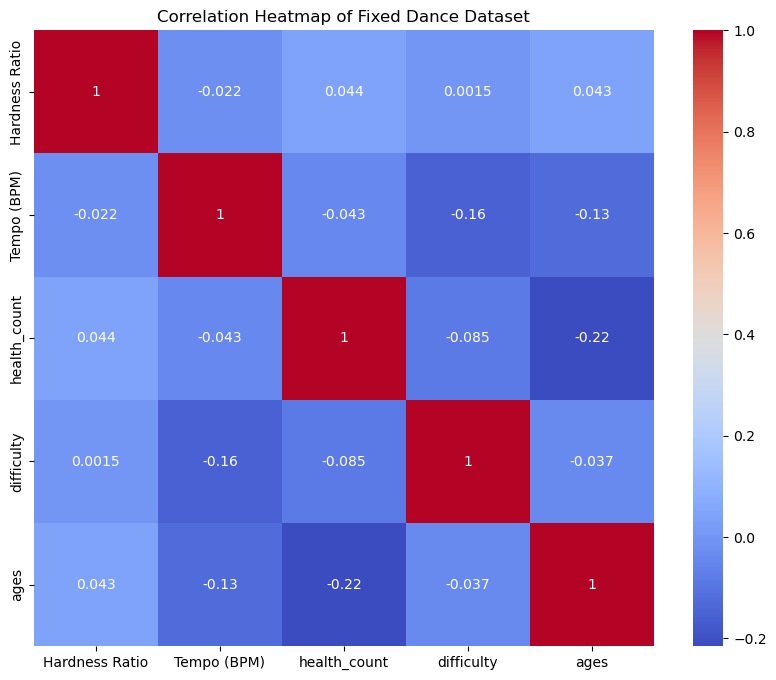

In [12]:
corr_matrix = df[numeric_cols_df].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Fixed Dance Dataset')


Text(0.5, 1.0, 'Heatmap of Missingness in Dance Dataset')

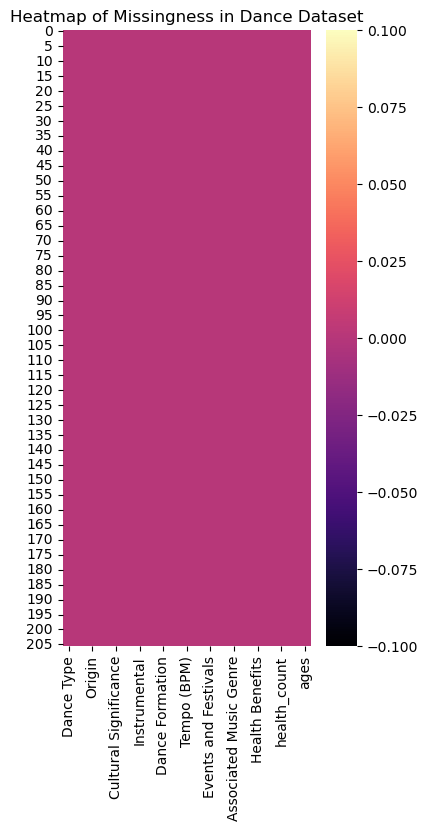

In [13]:
# plt.figure(figsize=(20,4))
plt.figure(figsize=(4,8))
# sns.heatmap(df.isna().transpose(), cmap="plasma")
# sns.heatmap(df.isna(), cmap="viridis")
sns.heatmap(df.isna(), cmap="magma")
plt.title("Heatmap of Missingness in Dance Dataset")

#Identify patterns in missing data 
#Decide on imputation strategy if necessary

# - There is no missing data to identify a pattern and no missing data to incorporate imputation

Text(0.5, 1.0, 'Correlation Heatmap for Health Benefits Matrix')

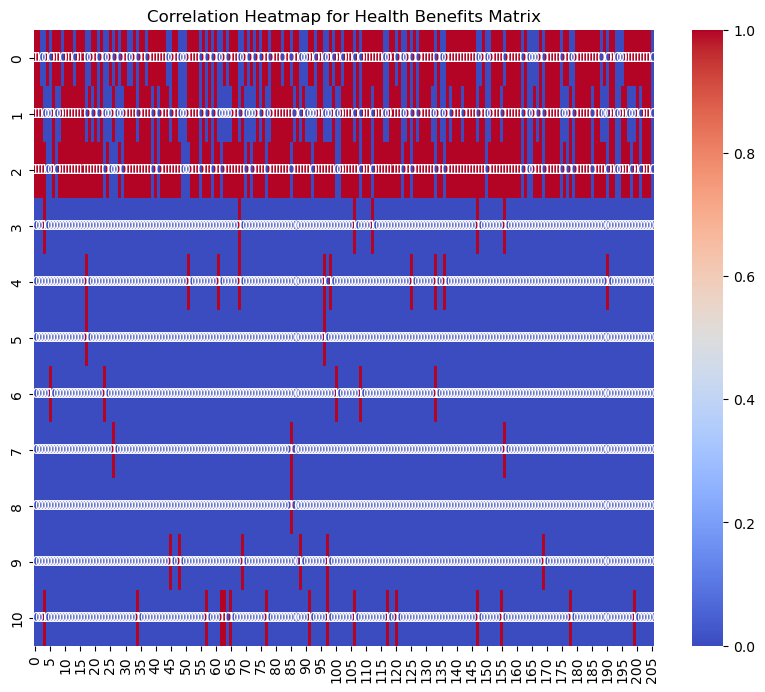

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(health_benefits_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap for Health Benefits Matrix')

#The most prevalent health beenfits in this dataset are the first 3: cardiovascular, flexibility, and stress relief

In [15]:
#IDA Step 6: Missing data analysis - Quantify missing data - Identify patterns in missing data - Decide on imputation strategy if necessary
#CALORIES

# Correlation Heatmap (Interactive)
selected_features = ['130 lb', '155 lb', '180 lb', '205 lb', 'Calories per kg']  # Focus on these variables
#.corr() - Compute pairwise correlation of columns, excluding NA/null values.
#.values - used to return a new view object that contains a list of all the values associated with the keys in the dictionary.
correlation_matrix = df2[selected_features].corr().values
#create_annotated_heatmap() - Function that creates annotated heatmaps 
fig_heatmap = ff.create_annotated_heatmap(
    #z- z matrix to create heatmap.
    z=correlation_matrix,
    #x - x-axis
    x=selected_features,
    #y - y-axis
    y=selected_features,
    # colorscale - heatmap colorscale -> Viridis - Use the color scales in this package to make plots that are pretty, 
    #better represent your data, easier to read by those with colorblindness, and print well in gray scale.
    colorscale='Viridis'
)
fig_heatmap.update_layout(
    #heatmap title
    title="Correlation Heatmap of Calories Dataset (Interactive)",
    #heatmap x-axis title
    xaxis_title="Features",
    #heatmap y-axis title
    yaxis_title="Features"
)
#print visualization
fig_heatmap.show()

Text(0.5, 1.0, 'Correlation Heatmap of Fixed Calories Dataset')

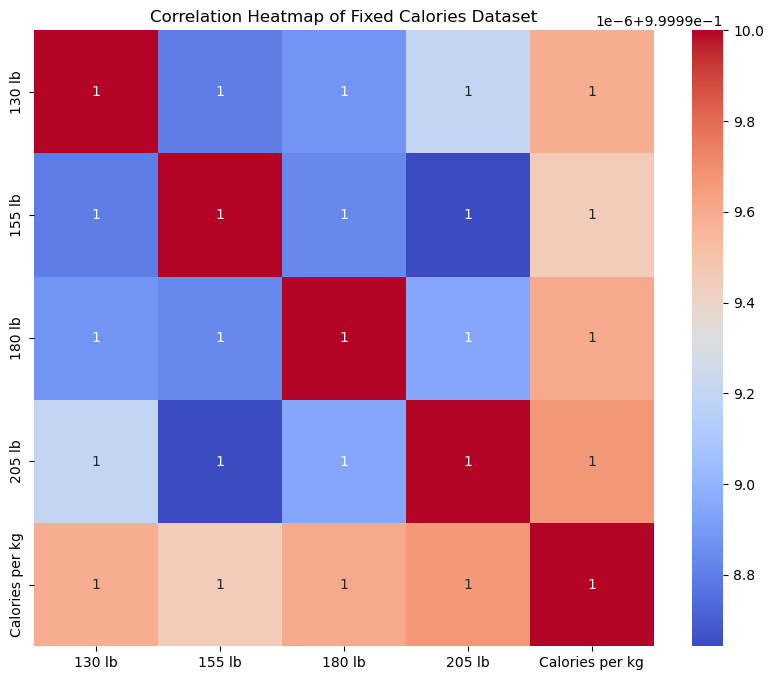

In [16]:
corr_matrix = df2[numeric_cols_df2].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Fixed Calories Dataset')

Text(0.5, 1.0, 'Correlation Heatmap for Fixed Edited Calories Dataset')

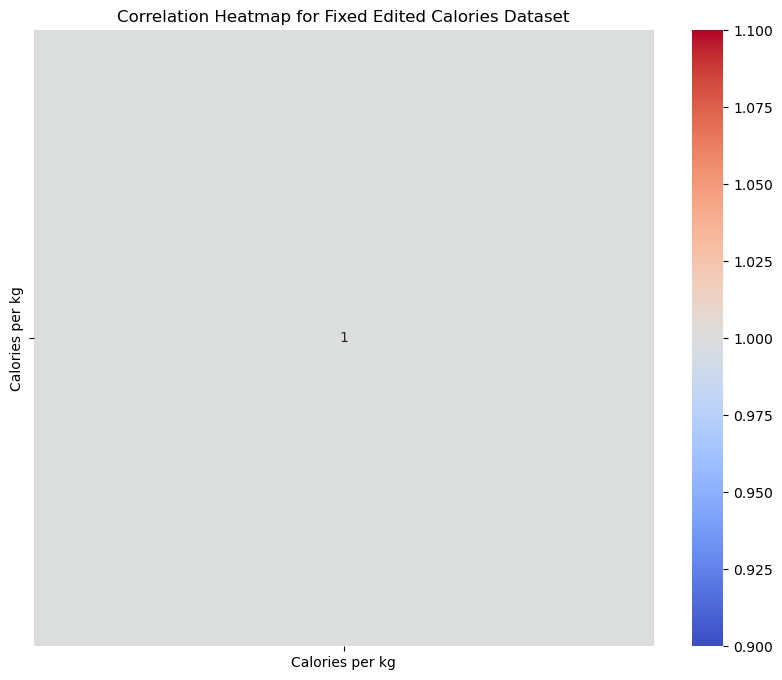

In [59]:
corr_matrix = d3[numeric_cols_d3].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Fixed Edited Calories Dataset')

Text(0.5, 1.0, 'Heatmap of Missingness in Calories Dataset')

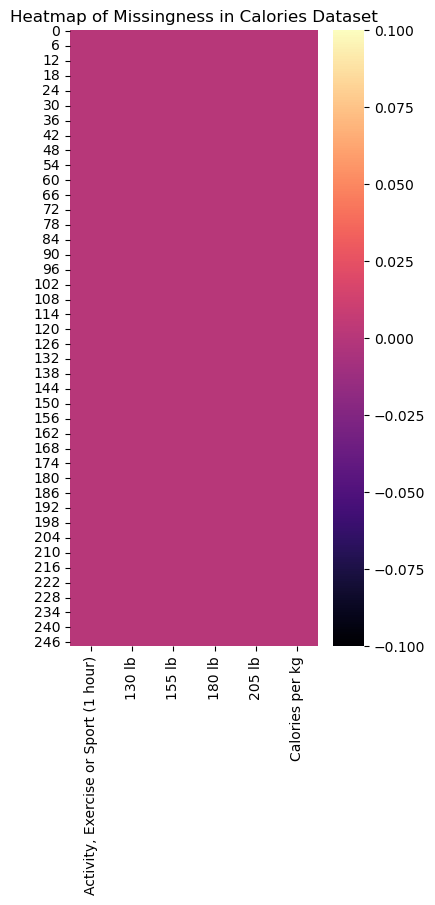

In [17]:
# plt.figure(figsize=(20,4))
plt.figure(figsize=(4,8))
# sns.heatmap(df.isna().transpose(), cmap="plasma")
# sns.heatmap(df.isna(), cmap="viridis")
sns.heatmap(df2.isna(), cmap="magma")
plt.title("Heatmap of Missingness in Calories Dataset")

#Identify patterns in missing data 

#Decide on imputation strategy if necessary

# - There is no missing data to identify a pattern and no missing data to incorporate imputation

****************
Outliers for Hardness Ratio :                  Dance Type                                       Dance style  \
31         Ceremonial dance                                     Worship dance   
33         Disco Soul dance  Boogaloo and Electric boogaloo (Electric boogie)   
42         Disco Soul dance                                               Fly   
125  Novelty and fad dances                                              Swim   
136            Social dance                                      Square dance   
203                   Other                                     Lyrical dance   

            Origin   Time Period  \
31           India  20th century   
33   United States  20th century   
42   United States  20th century   
125  United States  20th century   
136  United States  20th century   
203  United States  20th century   

                                 Cultural Significance  \
31   It is an important part of religious ceremonie...   
33   It is a Pop

Text(0.5, 1.0, 'Difficulty Outlier')

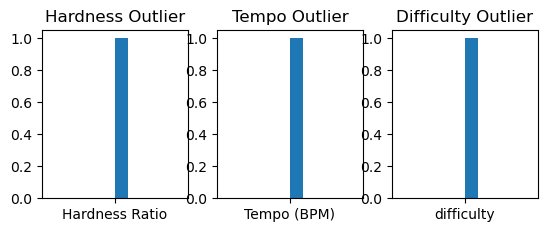

In [66]:
#IDA Step 7: Outlier detection - Identify potential outliers - Assess impact of outliers - Decide on treatment of outliers
#DANCE

#Identify potential outliers 

# Calculate the z-score 
def outlier(column):
    z = np.abs(stats.zscore(df[column]))
    # Identify outliers as students with a z-score greater than 3
    threshold = 3
    outliers = df[z > threshold]
    # Print the outliers
    print("****************")
    print("Outliers for", column, ":", outliers)
    print("*****************")
outlier('Hardness Ratio') #ceremonial dance (worship dance), disco soul dance (boogaloo and electric boogaloo, and fly), novelty and fad dances (swin), social dace (square dance), other(lyrical dance)
outlier('Tempo (BPM)') #latin dance rhythm (samba - brazilian dance, pasodoble)
outlier('health_count') #no outliers
outlier('difficulty') #cceremonial dance (rejang dance)
outlier('ages') #no outliers

#Assess impact of outliers
#Create a histogram

plt.subplot(2,3,1)
plt.hist('Hardness Ratio')
plt.title("Hardness Outlier")

plt.subplot(2,3,2)
plt.hist('Tempo (BPM)')
plt.title("Tempo Outlier")

plt.subplot(2,3,3)
plt.hist('difficulty')
plt.title("Difficulty Outlier")




Text(0.5, 1.0, 'Hardness Overall Plot')

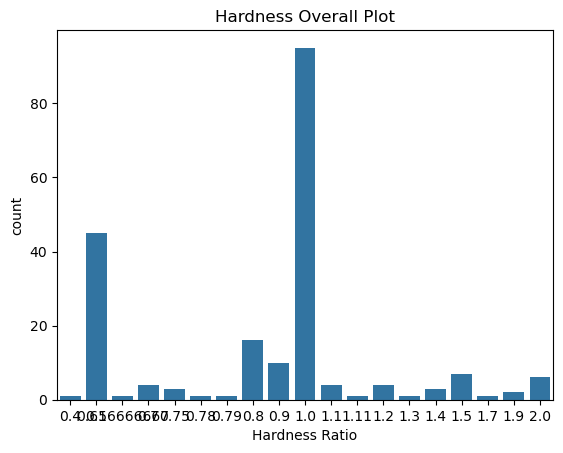

In [19]:
sns.countplot(x='Hardness Ratio', data=df)
plt.title("Hardness Overall Plot")
#plot shows over 80 dancers have a hardness ration score of 1, making this number the outlier of the hardness column

Text(0.5, 1.0, 'Tempo Overall Plot')

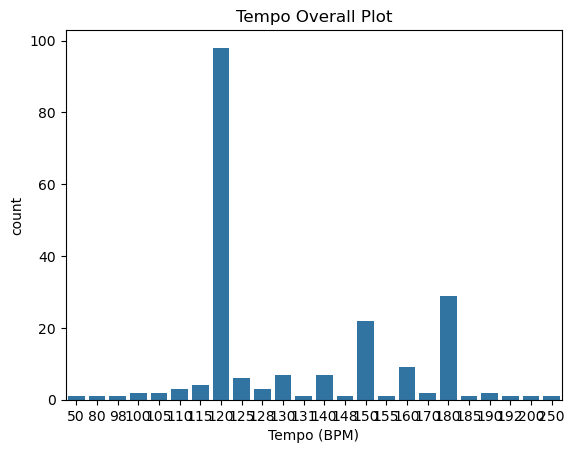

In [20]:
sns.countplot(x='Tempo (BPM)', data=df)
plt.title("Tempo Overall Plot")
#plot shows that for aboout 100 dances have the tempo at 120 beats per minute, making this number the outlier for the tempo column


Text(0.5, 1.0, 'Difficulty Overall Plot')

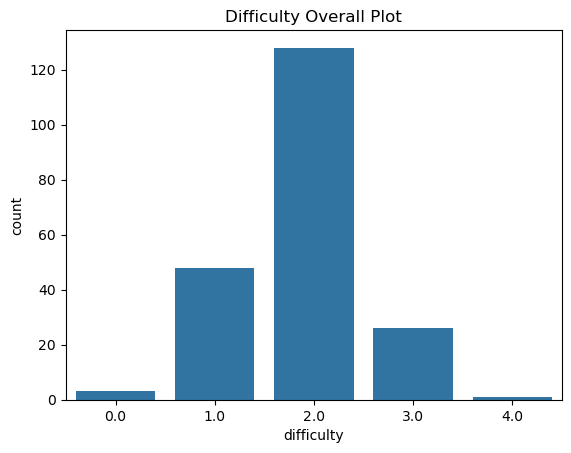

In [21]:
sns.countplot(x='difficulty', data=df)
plt.title("Difficulty Overall Plot")
#the plot shows that over 120 dances have a difficulty score of 2, making this number the outlier of the difficulty column

****************
Outliers for 205 lb :     Activity, Exercise or Sport (1 hour)  130 lb  155 lb  180 lb  205 lb  \
47      Running, 10.9 mph (5.5 min mile)    1062    1267    1471    1675   
217         Cross country skiing, uphill     974    1161    1348    1536   

     Calories per kg  
47          3.706591  
217         3.397878  
*****************
****************
Outliers for Calories per kg :     Activity, Exercise or Sport (1 hour)  130 lb  155 lb  180 lb  205 lb  \
47      Running, 10.9 mph (5.5 min mile)    1062    1267    1471    1675   
217         Cross country skiing, uphill     974    1161    1348    1536   

     Calories per kg  
47          3.706591  
217         3.397878  
*****************


Text(0.5, 1.0, 'Calories  Outlier')

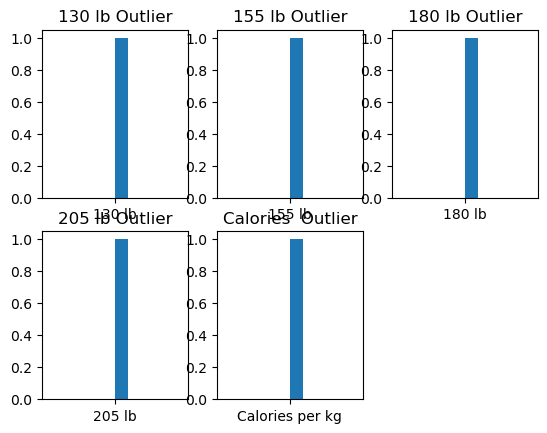

In [22]:
#IDA Step 7: Outlier detection - Identify potential outliers - Assess impact of outliers - Decide on treatment of outliers
#CALORIES
#['130 lb', '155 lb', '180 lb', '205 lb', 'Calories per kg']
#Identify potential outliers 

# Calculate the z-score 
def outlier(column):
    z = np.abs(stats.zscore(df2[column]))
    # Identify outliers as students with a z-score greater than 3
    threshold = 3
    outliers = df2[z > threshold]
    # Print the outliers
    print("****************")
    print("Outliers for", column, ":", outliers)
    print("*****************")
#outlier('130 lb') #running, cross country skiing
#outlier('155 lb') #running, cross country skiing
#outlier('180 lb') #running, cross country skiing
outlier('205 lb') #running, cross country skiing
outlier('Calories per kg') #running, cross country skiing
#all the variables have the same outliers...?

#Assess impact of outliers
#Create a histogram

plt.subplot(2,3,1)
plt.hist('130 lb')
plt.title("130 lb Outlier")

plt.subplot(2,3,2)
plt.hist('155 lb')
plt.title("155 lb Outlier")

plt.subplot(2,3,3)
plt.hist('180 lb')
plt.title("180 lb Outlier")

plt.subplot(2,3,4)
plt.hist('205 lb')
plt.title("205 lb Outlier")

plt.subplot(2,3,5)
plt.hist('Calories per kg')
plt.title("Calories  Outlier")


****************
Outliers for Calories per kg : Empty DataFrame
Columns: [Activity, Exercise or Sport (1 hour), Calories per kg]
Index: []
*****************


Text(0.5, 1.0, 'Edited Calories Outlier')

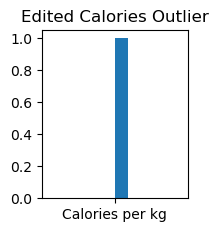

In [62]:
#D3
# Calculate the z-score 
def outlier(column):
    z = np.abs(stats.zscore(d3[column]))
    # Identify outliers as students with a z-score greater than 3
    threshold = 3
    outliers = d3[z > threshold]
    # Print the outliers
    print("****************")
    print("Outliers for", column, ":", outliers)
    print("*****************")
#outlier('130 lb') #running, cross country skiing
#outlier('155 lb') #running, cross country skiing
#outlier('180 lb') #running, cross country skiing
#outlier('205 lb') #running, cross country skiing
outlier('Calories per kg') #running, cross country skiing
#all the variables have the same outliers...?

#Assess impact of outliers
#Create a histogram

plt.subplot(2,3,1)
plt.hist('Calories per kg')
plt.title("Edited Calories Outlier")

Text(0.5, 1.0, '130 lb Overall Plot')

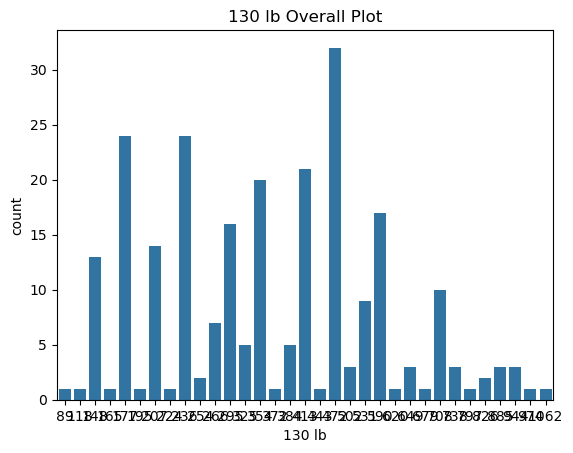

In [23]:
sns.countplot(x='130 lb', data=df2)
plt.title("130 lb Overall Plot")
#plot shows over 80 dancers have a hardness ration score of 1, making this number the outlier of the hardness column

Text(0.5, 1.0, '155 lb Overall Plot')

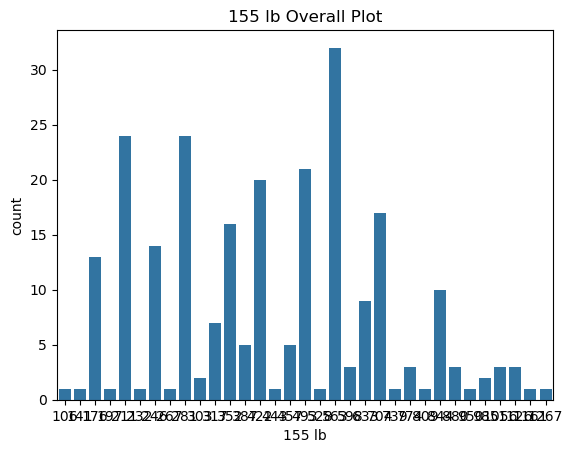

In [24]:
sns.countplot(x='155 lb', data=df2)
plt.title("155 lb Overall Plot")
#plot shows over 80 dancers have a hardness ration score of 1, making this number the outlier of the hardness column

Text(0.5, 1.0, '180 lb Overall Plot')

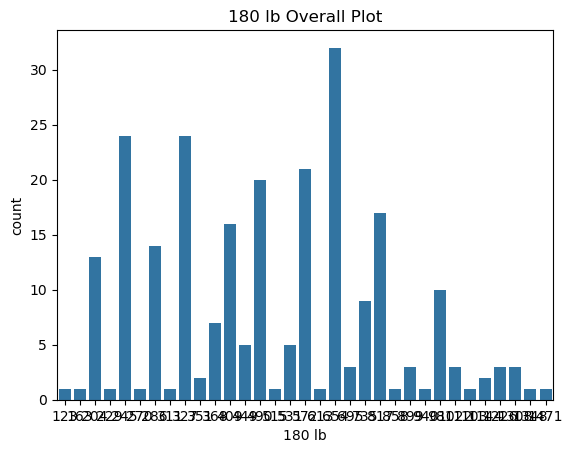

In [25]:
sns.countplot(x='180 lb', data=df2)
plt.title("180 lb Overall Plot")
#plot shows over 80 dancers have a hardness ration score of 1, making this number the outlier of the hardness column

Text(0.5, 1.0, '205 lb Overall Plot')

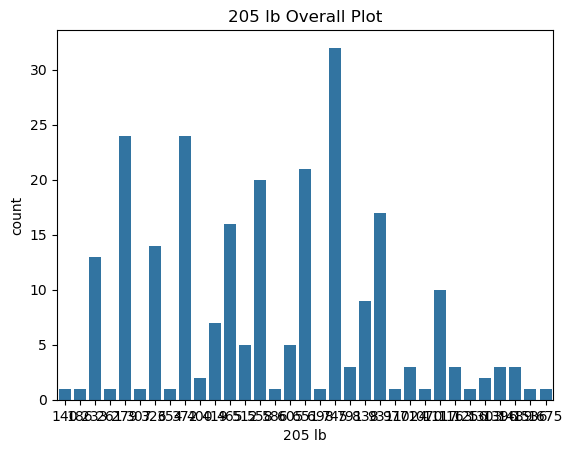

In [26]:
sns.countplot(x='205 lb', data=df2)
plt.title("205 lb Overall Plot")
#plot shows over 80 dancers have a hardness ration score of 1, making this number the outlier of the hardness column

Text(0.5, 1.0, 'Calories Overall Plot')

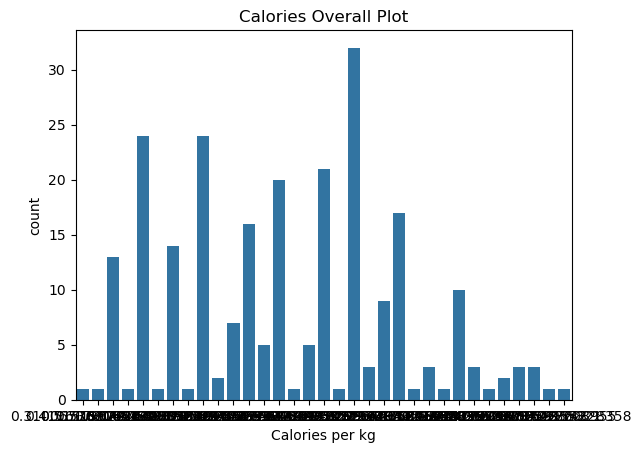

In [27]:
sns.countplot(x='Calories per kg', data=df2)
plt.title("Calories Overall Plot")
#all the plots are coming out the same for the outliers in each column

Text(0.5, 1.0, 'Calories Overall Plot')

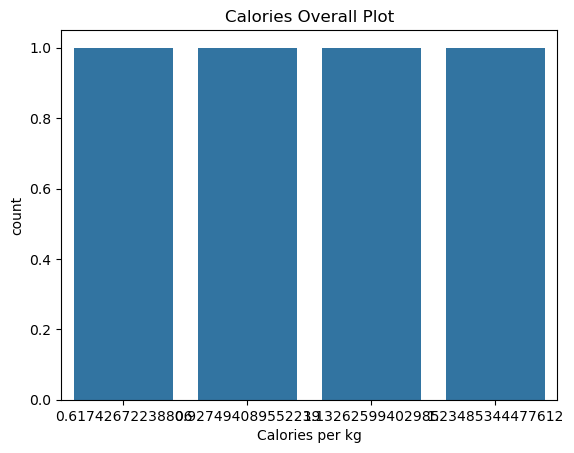

In [61]:
#D3
sns.countplot(x='Calories per kg', data=d3)
plt.title("Calories Overall Plot")
#all the plots are coming out the same for the outliers in each column

In [28]:
#Note: Try doing the iqr - interquartile range to find the outliers over the z-score: 
#IQR for Outliers
def outlier(column):
    # calculate IQR for column Height
    Q1 = df2[column].quantile(0.25)
    Q3 = df2[column].quantile(0.75)
    IQR = Q3 - Q1

    # identify outliers
    threshold = 1.5
    outliers = df2[(df2[column] < Q1 - threshold * IQR) | (df2[column] > Q3 + threshold * IQR)]
    print("****")
    print("Outliers for", column, ":", outliers)
    print("****")

outlier('130 lb')#Cycling, >20 mph, racing,  Running, 9 mph (6.5 min mile), Running, 10 mph (6 min mile), Running, 10.9 mph (5.5 min mile), Running, stairs, up, Skin diving, fast, Cross country skiing, uphill
#the calories are btw 3-3.39
outlier('155 lb') #same outliers
outlier('180 lb') #same outliers
outlier('205 lb') #same outliers
outlier('Calories per kg')#same outliers


****
Outliers for 130 lb :     Activity, Exercise or Sport (1 hour)  130 lb  155 lb  180 lb  205 lb  \
2               Cycling, >20 mph, racing     944    1126    1308    1489   
45         Running, 9 mph (6.5 min mile)     885    1056    1226    1396   
46          Running, 10 mph (6 min mile)     944    1126    1308    1489   
47      Running, 10.9 mph (5.5 min mile)    1062    1267    1471    1675   
51                   Running, stairs, up     885    1056    1226    1396   
188                    Skin diving, fast     944    1126    1308    1489   
212      Speed skating, ice, competitive     885    1056    1226    1396   
217         Cross country skiing, uphill     974    1161    1348    1536   

     Calories per kg  
2           3.294974  
45          3.089165  
46          3.294974  
47          3.706591  
51          3.089165  
188         3.294974  
212         3.089165  
217         3.397878  
****
****
Outliers for 155 lb :     Activity, Exercise or Sport (1 hour)  130 lb 

**For all of the outliers being the same for the columns in the dataset**
1. Try doing the iqr - interquartile range to find the outliers over the z-score: if output is the same...</h3>

**Common Situations and How to Handle Them:**</h3>

**Constant Columns:** Remove these columns, as they provide no useful information.</h3> 

</h3>**Correlated Outliers:** Investigate if the outliers are due to underlying relationships between variables</h3>

 - It seems the outliers are all correlated with each other. All of the columns have the same outlier because the person who participated in this exercise had greater amount of calories burned then the other participants in the dataset.
Due to this discovery, I plan on leaving the outliers how they are.</h3> 

**Data Errors:** Check your preprocessing steps for errors, like improper normalization, scaling, or incorrect filling of missing data.</h3> 

**Legitimate Outliers:** If the same values are indeed outliers across multiple columns, further investigate the source of these observations to determine if they represent legitimate anomalies or noise.</h3>

- To sum up, if all columns have the same values for outliers, this could point to redundant or non-informative data, preprocessing issues, or a shared pattern in the data.</h3>


Text(0.5, 1.0, 'Health Count')

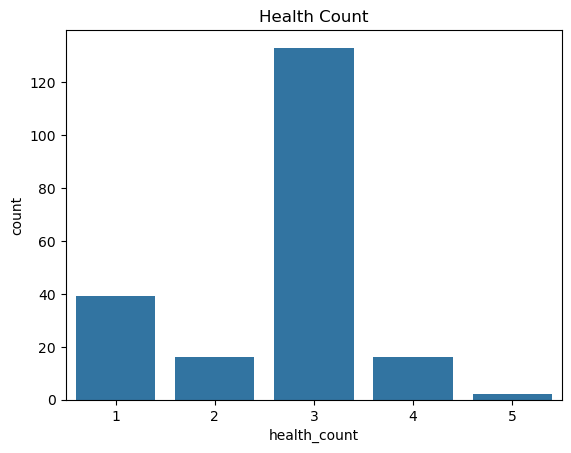

In [29]:
#EDA Step 1: Univariate analysis - Create histograms, box plots for numeric variables - Generate bar charts for categorical variables - Calculate summary statistics
#DANCE DATASET

#Create histograms, box plots for numeric variables
#I already created histograms for (hardness, difficulty, and tempo) in the previous code blocks 

sns.countplot(x='health_count', data=df)
plt.title("Health Count")


Text(0.5, 1.0, 'Ages')

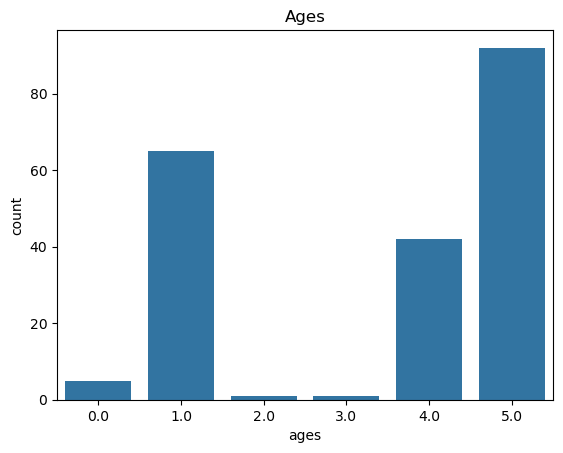

In [30]:
sns.countplot(x='ages', data=df)
plt.title("Ages")

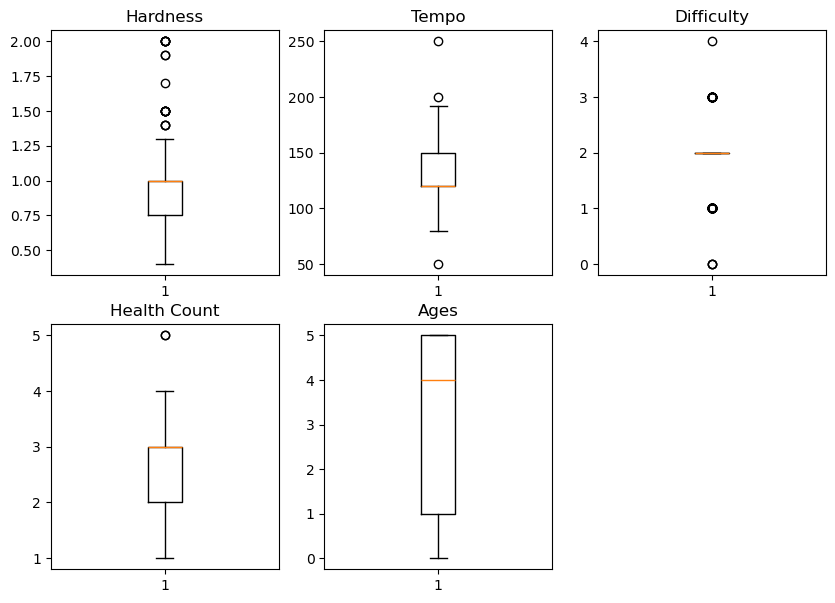

In [64]:
#Box plots
#create a box plot

#fig = p.box(df, y=”fare_amount”)

#fig.show()

#plt.box(df, x='Hardness Ratio')
#plt.title("Hardness")
fig = plt.figure(figsize =(10, 7))

# Creating plot
plt.subplot(2,3,1)
plt.boxplot(df['Hardness Ratio'])
plt.title("Hardness")

plt.subplot(2,3,2)
plt.boxplot(df['Tempo (BPM)'])
plt.title("Tempo")

plt.subplot(2,3,3)
plt.boxplot(df['difficulty'])
plt.title("Difficulty")

plt.subplot(2,3,4)
plt.boxplot(df['health_count'])
plt.title("Health Count")

plt.subplot(2,3,5)
plt.boxplot(df['ages'])
plt.title("Ages")


# show plot
plt.show()

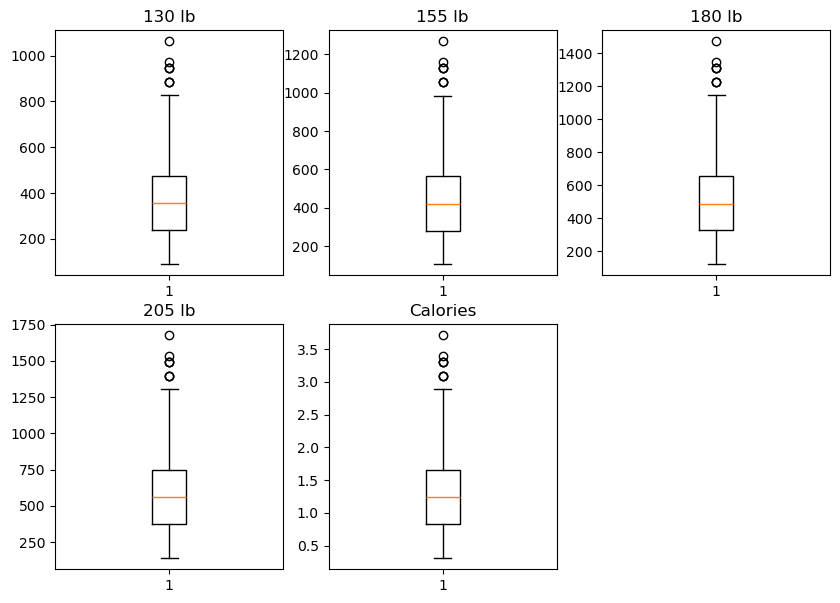

In [32]:
#EDA Step 1: Univariate analysis - Create histograms, box plots for numeric variables - Generate bar charts for categorical variables - Calculate summary statistics
#CALORIES DATASET

#Create histograms, box plots for numeric variables
#I already created histograms for all of the columns in the dataset

#Box plots
#create a box plot

#fig = p.box(df, y=”fare_amount”)

#fig.show()

#plt.box(df, x='Hardness Ratio')
#plt.title("Hardness")
fig = plt.figure(figsize =(10, 7))

# Creating plot
plt.subplot(2,3,1)
plt.boxplot(df2['130 lb'])
plt.title("130 lb")

plt.subplot(2,3,2)
plt.boxplot(df2['155 lb'])
plt.title("155 lb")

plt.subplot(2,3,3)
plt.boxplot(df2['180 lb'])
plt.title("180 lb")

plt.subplot(2,3,4)
plt.boxplot(df2['205 lb'])
plt.title("205 lb")

plt.subplot(2,3,5)
plt.boxplot(df2['Calories per kg'])
plt.title("Calories")

# show plot
plt.show()

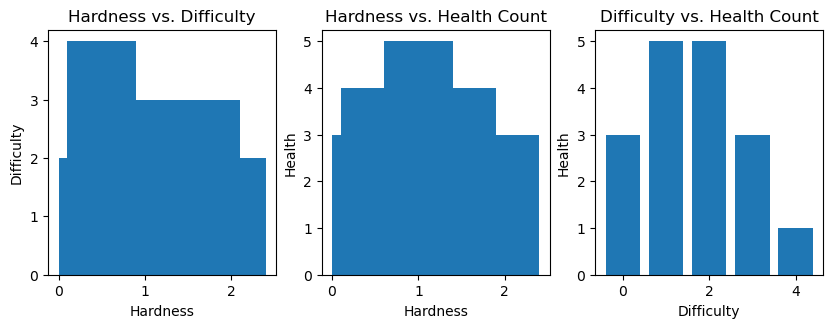

"\n1. Dance Type - independent - textual - general type of dance</h3>\n2. Dance style - dependent - textual  - the specific dance style</h3>\n3. Origin - independent - textual - where the county the dance originated from</h3>\n4. Time Period - independent - interval - the time period the dance was created in</h3>\n5. Cultural Significance - independent - textual - the dances' importance/impact from its place of origin </h3>\n6. Notable Characteristics - independent - textual - the intricate and specific elements of the dance</h3>\n7. Instrumental - independent - textual - the instruments used for the music the dances usually are perfomed with </h3>\n8. Hardness Ratio - dependent - real/categorical  - ranking the level on difficulty of the dance</h3>\n9. Dance Formation - dependent - textual - the usual organization of the dancers when the dance is performed</h3>\n10. Costume - dependent - textual - what the dancers usually wear when the dance is performed</h3>\n11. Tempo (BPM) - depend

In [33]:
#Generate bar charts for categorical variables
#There are only cateogrical variables in the Dance Dataset
#DANCE 
#Categorical -> Hardness Ratio, Learning Difficulty, Health Benefits

fig = plt.figure(figsize =(10, 7))

# Hardness vs. Difficulty
plt.subplot(2,3,1)
plt.bar(df['Hardness Ratio'], df['difficulty'])
plt.title('Hardness vs. Difficulty')
plt.xlabel('Hardness')
plt.ylabel('Difficulty')

# Hardness vs. Health Count
plt.subplot(2,3,2)
plt.bar(df['Hardness Ratio'], df['health_count'])
plt.title('Hardness vs. Health Count')
plt.xlabel('Hardness')
plt.ylabel('Health')

# Difficulty vs. Health Count
plt.subplot(2,3,3)
plt.bar(df['difficulty'], df['health_count'])
plt.title('Difficulty vs. Health Count')
plt.xlabel('Difficulty')
plt.ylabel('Health')

plt.show()


'''
1. Dance Type - independent - textual - general type of dance</h3>
2. Dance style - dependent - textual  - the specific dance style</h3>
3. Origin - independent - textual - where the county the dance originated from</h3>
4. Time Period - independent - interval - the time period the dance was created in</h3>
5. Cultural Significance - independent - textual - the dances' importance/impact from its place of origin </h3>
6. Notable Characteristics - independent - textual - the intricate and specific elements of the dance</h3>
7. Instrumental - independent - textual - the instruments used for the music the dances usually are perfomed with </h3>
8. Hardness Ratio - dependent - real/categorical  - ranking the level on difficulty of the dance</h3>
9. Dance Formation - dependent - textual - the usual organization of the dancers when the dance is performed</h3>
10. Costume - dependent - textual - what the dancers usually wear when the dance is performed</h3>
11. Tempo (BPM) - dependent - real - the tempo; beats per minute used in the music the dances are usually performed with</h3>
12. Famous Practitioners - dependent - textual - famous people who are known for perfoming the specific dance</h3>
13. Events and Festivals - independent - textual - locations where the dances are performed at</h3>
14. Modern Adaptations - dependent - textual - the evolution/expansion of the certain dance</h3>
15. Associated Music Genre - dependent - textual - the category of music the dance is usually performed to</h3>
16. Learning Difficulty - dependent - ordinal/categorical - ranking the level of difficulty it is to learn the dance</h3>
17. Health Benefits - dependent - category - the positive health attributes associated with practicing/performing these dances</h3>

'''

In [34]:
#Interactive Bar Plot -  # Hardness vs. Difficulty
import plotly.express as px
fig = px.bar(df, x='Hardness Ratio', y='difficulty', title='Hardness vs. Difficulty')
fig.show()

In [35]:
#Interactive Bar Plot -  Hardness vs. Health Count
import plotly.express as px
fig = px.bar(df, x='Hardness Ratio', y='health_count', title='Hardness vs. Health Count')
fig.show()

In [36]:
#Interactive Bar Plot - Difficulty vs. Health Count
import plotly.express as px
fig = px.bar(df, x='difficulty', y='health_count', title='Difficulty vs. Health Count')
fig.show()

In [71]:
# EDA Step 2: Bivariate analysis - Create scatter plots - Perform cross-tabulations - Calculate correlations between pairs of variables
#DANCE

#Create scatter plots
#Scatterplot - continuous vars - infinite possible values and ofterm measure with some precision
# - uses - scientific measurements and physical properties
# Scientific measurements - mass, length, temperature, meter, time
# Physical properties - include color, density, hardness, and melting and boiling points.
# - Vars: Hardness Ratio (hardness), Tempo (BPM) (time)
 
#go - low level data that is specific and flexible
import plotly.graph_objects as go
#!pip install plotly

# Put the data into a pandas df
dataF = pd.DataFrame({'x': df['Hardness Ratio'],
                   'y': df['Tempo (BPM)']})

#Create the figure (for the moment: a blank graph)
fig = go.Figure()

# Add the scatter trace
fig.add_trace(go.Scatter( 
    x=dataF['x'], # Variable in the x-axis
    y=dataF['y'], # Variable in the y-axis
    mode='markers', # This explicitly states that we want our observations to be represented by points
    
    # Properties associated with points 
    marker=dict(
        size=12, # Size
        color='#cb1dd1', # Color
        opacity=0.8, # Point transparency 
        line=dict(width=1, color='black') # Properties of the edges
    ),
))

# Customize the layout
fig.update_layout(
    title='Interactive Scatter Plot of the Hardness vs. the Tempo of the Dances', # Title
    xaxis_title='Hardness', # x-axis name
    yaxis_title='Tempo', # y-axis name
    width=800,  # Set the width of the figure to 800 pixels
    height=600,  # Set the height of the figure to 600 pixels
)


In [73]:
# EDA Step 2: Bivariate analysis - Create scatter plots - Perform cross-tabulations - Calculate correlations between pairs of variables
#DANCE

#Create scatter plots
#Scatterplot - continuous vars - infinite possible values and ofterm measure with some precision
# - uses - scientific measurements and physical properties
# Scientific measurements - mass, length, temperature, meter, time
# Physical properties - include color, density, hardness, and melting and boiling points.
# - Vars: Hardness Ratio (hardness), Tempo (BPM) (time)
 
#go - low level data that is specific and flexible
import plotly.graph_objects as go
#!pip install plotly

# Put the data into a pandas df
dataF = pd.DataFrame({'x': df['health_count'],
                   'y': df['Tempo (BPM)']})

#Create the figure (for the moment: a blank graph)
fig = go.Figure()

# Add the scatter trace
fig.add_trace(go.Scatter( 
    x=dataF['x'], # Variable in the x-axis
    y=dataF['y'], # Variable in the y-axis
    mode='markers', # This explicitly states that we want our observations to be represented by points
    
    # Properties associated with points 
    marker=dict(
        size=12, # Size
        color='#cb1dd1', # Color
        opacity=0.8, # Point transparency 
        line=dict(width=1, color='black') # Properties of the edges
    ),
))

# Customize the layout
fig.update_layout(
    title='Interactive Scatter Plot of the Health Benefits vs. the Tempo of the Dances', # Title
    xaxis_title='Health Benefits', # x-axis name
    yaxis_title='Tempo', # y-axis name
    width=800,  # Set the width of the figure to 800 pixels
    height=600,  # Set the height of the figure to 600 pixels
)

In [38]:
# EDA Step 2: Bivariate analysis - Create scatter plots - Perform cross-tabulations - Calculate correlations between pairs of variables
#CALORIES

#Create scatter plots
#Scatterplot - continuous vars - infinite possible values and ofterm measure with some precision
# - uses - scientific measurements and physical properties
# Scientific measurements - mass, length, temperature, meter, time
# Physical properties - include color, density, hardness, and melting and boiling points.
# - Vars: all vars
 
#go - low level data that is specific and flexible
import plotly.graph_objects as go
#!pip install plotly

# Put the data into a pandas df
dataF = pd.DataFrame({'x': df2['130 lb'],
                   'y': df2['Calories per kg']})

#Create the figure (for the moment: a blank graph)
fig = go.Figure()

# Add the scatter trace
fig.add_trace(go.Scatter( 
    x=dataF['x'], # Variable in the x-axis
    y=dataF['y'], # Variable in the y-axis
    mode='markers', # This explicitly states that we want our observations to be represented by points
    
    # Properties associated with points 
    marker=dict(
        size=12, # Size
        color='#cb1dd1', # Color
        opacity=0.8, # Point transparency 
        line=dict(width=1, color='black') # Properties of the edges
    ),
))

# Customize the layout
fig.update_layout(
    title='Interactive Scatter Plot of 130 lb Participants vs. Calories Burned during Specific Activities', # Title
    xaxis_title='130 lb', # x-axis name
    yaxis_title='Calories per kg', # y-axis name
    width=800,  # Set the width of the figure to 800 pixels
    height=600,  # Set the height of the figure to 600 pixels
)

#Perfect Positive Linear Regression Model

In [39]:
# EDA Step 2: Bivariate analysis - Create scatter plots - Perform cross-tabulations - Calculate correlations between pairs of variables
#CALORIES

#Create scatter plots
#Scatterplot - continuous vars - infinite possible values and ofterm measure with some precision
# - uses - scientific measurements and physical properties
# Scientific measurements - mass, length, temperature, meter, time
# Physical properties - include color, density, hardness, and melting and boiling points.
# - Vars: all vars
 
#go - low level data that is specific and flexible
import plotly.graph_objects as go
#!pip install plotly

# Put the data into a pandas df
dataF = pd.DataFrame({'x': df2['155 lb'],
                   'y': df2['Calories per kg']})

#Create the figure (for the moment: a blank graph)
fig = go.Figure()

# Add the scatter trace
fig.add_trace(go.Scatter( 
    x=dataF['x'], # Variable in the x-axis
    y=dataF['y'], # Variable in the y-axis
    mode='markers', # This explicitly states that we want our observations to be represented by points
    
    # Properties associated with points 
    marker=dict(
        size=12, # Size
        color='#cb1dd1', # Color
        opacity=0.8, # Point transparency 
        line=dict(width=1, color='black') # Properties of the edges
    ),
))

# Customize the layout
fig.update_layout(
    title='Interactive Scatter Plot of 155 lb Participants vs. Calories Burned during Specific Activities', # Title
    xaxis_title='155 lb', # x-axis name
    yaxis_title='Calories per kg', # y-axis name
    width=800,  # Set the width of the figure to 800 pixels
    height=600,  # Set the height of the figure to 600 pixels
)
#Perfect Positive Linear Regression Model

In [40]:
# EDA Step 2: Bivariate analysis - Create scatter plots - Perform cross-tabulations - Calculate correlations between pairs of variables
#CALORIES

#Create scatter plots
#Scatterplot - continuous vars - infinite possible values and ofterm measure with some precision
# - uses - scientific measurements and physical properties
# Scientific measurements - mass, length, temperature, meter, time
# Physical properties - include color, density, hardness, and melting and boiling points.
# - Vars: all vars
 
#go - low level data that is specific and flexible
import plotly.graph_objects as go
#!pip install plotly

# Put the data into a pandas df
dataF = pd.DataFrame({'x': df2['180 lb'],
                   'y': df2['Calories per kg']})

#Create the figure (for the moment: a blank graph)
fig = go.Figure()

# Add the scatter trace
fig.add_trace(go.Scatter( 
    x=dataF['x'], # Variable in the x-axis
    y=dataF['y'], # Variable in the y-axis
    mode='markers', # This explicitly states that we want our observations to be represented by points
    
    # Properties associated with points 
    marker=dict(
        size=12, # Size
        color='#cb1dd1', # Color
        opacity=0.8, # Point transparency 
        line=dict(width=1, color='black') # Properties of the edges
    ),
))

# Customize the layout
fig.update_layout(
    title='Interactive Scatter Plot of 180 lb Participants vs. Calories Burned during Specific Activities', # Title
    xaxis_title='180 lb', # x-axis name
    yaxis_title='Calories per kg', # y-axis name
    width=800,  # Set the width of the figure to 800 pixels
    height=600,  # Set the height of the figure to 600 pixels
)
#Perfect Positive Linear Regression Model

In [41]:
# EDA Step 2: Bivariate analysis - Create scatter plots - Perform cross-tabulations - Calculate correlations between pairs of variables
#CALORIES

#Create scatter plots
#Scatterplot - continuous vars - infinite possible values and ofterm measure with some precision
# - uses - scientific measurements and physical properties
# Scientific measurements - mass, length, temperature, meter, time
# Physical properties - include color, density, hardness, and melting and boiling points.
# - Vars: all vars
 
#go - low level data that is specific and flexible
import plotly.graph_objects as go
#!pip install plotly

# Put the data into a pandas df
dataF = pd.DataFrame({'x': df2['205 lb'],
                   'y': df2['Calories per kg']})

#Create the figure (for the moment: a blank graph)
fig = go.Figure()

# Add the scatter trace
fig.add_trace(go.Scatter( 
    x=dataF['x'], # Variable in the x-axis
    y=dataF['y'], # Variable in the y-axis
    mode='markers', # This explicitly states that we want our observations to be represented by points
    
    # Properties associated with points 
    marker=dict(
        size=12, # Size
        color='#cb1dd1', # Color
        opacity=0.8, # Point transparency 
        line=dict(width=1, color='black') # Properties of the edges
    ),
))

# Customize the layout
fig.update_layout(
    title='Interactive Scatter Plot of 205 lb Participants vs. Calories Burned during Specific Activities', # Title
    xaxis_title='205 lb', # x-axis name
    yaxis_title='Calories per kg', # y-axis name
    width=800,  # Set the width of the figure to 800 pixels
    height=600,  # Set the height of the figure to 600 pixels
)
#Perfect Positive Linear Regression Model

In [67]:
#D3
# EDA Step 2: Bivariate analysis - Create scatter plots - Perform cross-tabulations - Calculate correlations between pairs of variables
#CALORIES

#Create scatter plots
#Scatterplot - continuous vars - infinite possible values and ofterm measure with some precision
# - uses - scientific measurements and physical properties
# Scientific measurements - mass, length, temperature, meter, time
# Physical properties - include color, density, hardness, and melting and boiling points.
# - Vars: all vars
 
#go - low level data that is specific and flexible
import plotly.graph_objects as go
#!pip install plotly

# Put the data into a pandas df
dataF = pd.DataFrame({'x': d3["Activity, Exercise or Sport (1 hour)"],
                   'y': d3['Calories per kg']})

#Create the figure (for the moment: a blank graph)
fig = go.Figure()

# Add the scatter trace
fig.add_trace(go.Scatter( 
    x=dataF['x'], # Variable in the x-axis
    y=dataF['y'], # Variable in the y-axis
    mode='markers', # This explicitly states that we want our observations to be represented by points
    
    # Properties associated with points 
    marker=dict(
        size=12, # Size
        color='#cb1dd1', # Color
        opacity=0.8, # Point transparency 
        line=dict(width=1, color='black') # Properties of the edges
    ),
))

# Customize the layout
fig.update_layout(
    title='Interactive Scatter Plot of Activity vs. Calories Burned', # Title
    xaxis_title="Activity, Exercise or Sport (1 hour)", # x-axis name
    yaxis_title='Calories per kg', # y-axis name
    width=800,  # Set the width of the figure to 800 pixels
    height=600,  # Set the height of the figure to 600 pixels
)
#Perfect Positive Linear Regression Model

In [42]:
#Perform cross-tabulations
#crosstab() - This method is used to compute a simple cross-tabulation of two (or more) factors. 
# By default, computes a frequency table of the factors unless an array of values and an aggregation function are passed.
#For categorical data

#DANCE

# form crosstab with dropna=True (default)
pd.crosstab(df['Hardness Ratio'], df['Tempo (BPM)'])

# form crosstab with dropna=False
pd.crosstab(df['Hardness Ratio'], df['Tempo (BPM)'], dropna=False)

Tempo (BPM),50,80,98,100,105,110,115,120,125,128,...,150,155,160,170,180,185,190,192,200,250
Hardness Ratio,,,,,,,,,,,,,,,,,,,,,
0.400000,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
0.500000,0,1,0,0,1,1,1,23,1,0,...,6,0,3,0,4,0,1,0,1,0
0.616667,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
0.700000,0,0,0,0,0,0,0,4,0,0,...,0,0,0,0,0,0,0,0,0,0
0.750000,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,1,0,0,0,0,0
0.780000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.790000,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
0.800000,0,0,0,1,0,0,1,7,1,0,...,1,0,0,0,3,0,0,0,0,1
0.900000,0,0,0,0,0,1,1,0,0,0,...,0,1,0,0,3,0,0,0,0,0


In [74]:
#Perform cross-tabulations
#crosstab() - This method is used to compute a simple cross-tabulation of two (or more) factors. 
# By default, computes a frequency table of the factors unless an array of values and an aggregation function are passed.
#For categorical data

#DANCE

# form crosstab with dropna=True (default)
pd.crosstab(df['health_count'], df['Tempo (BPM)'])

# form crosstab with dropna=False
pd.crosstab(df['health_count'], df['Tempo (BPM)'], dropna=False)

Tempo (BPM),50,80,98,100,105,110,115,120,125,128,...,150,155,160,170,180,185,190,192,200,250
health_count,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,2,0,18,2,0,...,4,0,1,0,9,0,0,0,0,0
2,0,0,0,0,0,0,1,8,0,0,...,2,0,0,1,2,0,0,0,0,0
3,1,1,1,2,1,1,2,62,4,3,...,16,1,7,1,17,1,2,0,1,0
4,0,0,0,0,1,0,1,9,0,0,...,0,0,1,0,1,0,0,1,0,1
5,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
#Perform cross-tabulations
#crosstab() - This method is used to compute a simple cross-tabulation of two (or more) factors. 
# By default, computes a frequency table of the factors unless an array of values and an aggregation function are passed.
#For categorical data

#CALORIES
#130 lb

# form crosstab with dropna=True (default)
pd.crosstab(df2['130 lb'], df2['Calories per kg'])

# form crosstab with dropna=False
pd.crosstab(df2['130 lb'], df2['Calories per kg'], dropna=False)

Calories per kg,0.310067,0.411618,0.515199,0.576807,0.617427,0.679711,0.721008,0.782615,0.823236,0.885520,...,2.265252,2.368156,2.471061,2.574642,2.779774,2.882679,3.089165,3.294974,3.397878,3.706591
130 lb,,,,,,,,,,,,,,,,,,,,,
89,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
118,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
148,0,0,13,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
165,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
177,0,0,0,0,24,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
195,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
207,0,0,0,0,0,0,14,0,0,0,...,0,0,0,0,0,0,0,0,0,0
224,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
236,0,0,0,0,0,0,0,0,24,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
#Perform cross-tabulations
#crosstab() - This method is used to compute a simple cross-tabulation of two (or more) factors. 
# By default, computes a frequency table of the factors unless an array of values and an aggregation function are passed.
#For categorical data

#CALORIES
#155 lb

# form crosstab with dropna=True (default)
pd.crosstab(df2['155 lb'], df2['Calories per kg'])

# form crosstab with dropna=False
pd.crosstab(df2['155 lb'], df2['Calories per kg'], dropna=False)

Calories per kg,0.310067,0.411618,0.515199,0.576807,0.617427,0.679711,0.721008,0.782615,0.823236,0.885520,...,2.265252,2.368156,2.471061,2.574642,2.779774,2.882679,3.089165,3.294974,3.397878,3.706591
155 lb,,,,,,,,,,,,,,,,,,,,,
106,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
141,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
176,0,0,13,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
197,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
211,0,0,0,0,24,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
232,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246,0,0,0,0,0,0,14,0,0,0,...,0,0,0,0,0,0,0,0,0,0
267,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
281,0,0,0,0,0,0,0,0,24,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
#Perform cross-tabulations
#crosstab() - This method is used to compute a simple cross-tabulation of two (or more) factors. 
# By default, computes a frequency table of the factors unless an array of values and an aggregation function are passed.
#For categorical data

#CALORIES
#180 lbs

# form crosstab with dropna=True (default)
pd.crosstab(df2['180 lb'], df2['Calories per kg'])

# form crosstab with dropna=False
pd.crosstab(df2['180 lb'], df2['Calories per kg'], dropna=False)

Calories per kg,0.310067,0.411618,0.515199,0.576807,0.617427,0.679711,0.721008,0.782615,0.823236,0.885520,...,2.265252,2.368156,2.471061,2.574642,2.779774,2.882679,3.089165,3.294974,3.397878,3.706591
180 lb,,,,,,,,,,,,,,,,,,,,,
123,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
163,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
204,0,0,13,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
229,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
245,0,0,0,0,24,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
270,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
286,0,0,0,0,0,0,14,0,0,0,...,0,0,0,0,0,0,0,0,0,0
311,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
327,0,0,0,0,0,0,0,0,24,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
#Perform cross-tabulations
#crosstab() - This method is used to compute a simple cross-tabulation of two (or more) factors. 
# By default, computes a frequency table of the factors unless an array of values and an aggregation function are passed.
#For categorical data

#CALORIES
#205 lb

# form crosstab with dropna=True (default)
pd.crosstab(df2['205 lb'], df2['Calories per kg'])

# form crosstab with dropna=False
pd.crosstab(df2['205 lb'], df2['Calories per kg'], dropna=False)

Calories per kg,0.310067,0.411618,0.515199,0.576807,0.617427,0.679711,0.721008,0.782615,0.823236,0.885520,...,2.265252,2.368156,2.471061,2.574642,2.779774,2.882679,3.089165,3.294974,3.397878,3.706591
205 lb,,,,,,,,,,,,,,,,,,,,,
140,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
186,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
233,0,0,13,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
261,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
279,0,0,0,0,24,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
307,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
326,0,0,0,0,0,0,14,0,0,0,...,0,0,0,0,0,0,0,0,0,0
354,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
372,0,0,0,0,0,0,0,0,24,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
#D3
#Perform cross-tabulations
#crosstab() - This method is used to compute a simple cross-tabulation of two (or more) factors. 
# By default, computes a frequency table of the factors unless an array of values and an aggregation function are passed.
#For categorical data

#CALORIES
#205 lb

# form crosstab with dropna=True (default)
pd.crosstab(d3['Activity, Exercise or Sport (1 hour)'], d3['Calories per kg'])

# form crosstab with dropna=False
pd.crosstab(d3['Activity, Exercise or Sport (1 hour)'], d3['Calories per kg'], dropna=False)

Calories per kg,0.617427,0.927494,1.132626,1.234853
"Activity, Exercise or Sport (1 hour)",,,,
"Ballet, twist, jazz, tap",0,1,0,0
"Ballroom dancing, fast",0,0,1,0
"Ballroom dancing, slow",1,0,0,0
Jazzercise,0,0,0,1


In [47]:
#Calculate correlations between pairs of variables
#Correlation Coefficient 
#DANCE

rho = np.corrcoef(df['Hardness Ratio'], df['Tempo (BPM)'])
print(rho)

# Correlation Heatmap (Interactive)
selected_features = ['Hardness Ratio', 'Tempo (BPM)']  # Focus on these variables
#.corr() - Compute pairwise correlation of columns, excluding NA/null values.
#.values - used to return a new view object that contains a list of all the values associated with the keys in the dictionary.
correlation_matrix = df[selected_features].corr().values
#create_annotated_heatmap() - Function that creates annotated heatmaps 
fig_heatmap = ff.create_annotated_heatmap(
    #z- z matrix to create heatmap.
    z=correlation_matrix,
    #x - x-axis
    x=selected_features,
    #y - y-axis
    y=selected_features,
    # colorscale - heatmap colorscale -> Viridis - Use the color scales in this package to make plots that are pretty, 
    #better represent your data, easier to read by those with colorblindness, and print well in gray scale.
    colorscale='Viridis'
)
fig_heatmap.update_layout(
    #heatmap title
    title="Correlation Matrix Heatmap (Hardness and Tempo)",
    #heatmap x-axis title
    xaxis_title="Features",
    #heatmap y-axis title
    yaxis_title="Features"
)
#print visualization
fig_heatmap.show()

[[ 1.         -0.02234548]
 [-0.02234548  1.        ]]


In [76]:
#Calculate correlations between pairs of variables
#Correlation Coefficient 
#DANCE

rho = np.corrcoef(df['health_count'], df['Tempo (BPM)'])
print(rho)

# Correlation Heatmap (Interactive)
selected_features = ['health_count', 'Tempo (BPM)']  # Focus on these variables
#.corr() - Compute pairwise correlation of columns, excluding NA/null values.
#.values - used to return a new view object that contains a list of all the values associated with the keys in the dictionary.
correlation_matrix = df[selected_features].corr().values
#create_annotated_heatmap() - Function that creates annotated heatmaps 
fig_heatmap = ff.create_annotated_heatmap(
    #z- z matrix to create heatmap.
    z=correlation_matrix,
    #x - x-axis
    x=selected_features,
    #y - y-axis
    y=selected_features,
    # colorscale - heatmap colorscale -> Viridis - Use the color scales in this package to make plots that are pretty, 
    #better represent your data, easier to read by those with colorblindness, and print well in gray scale.
    colorscale='Viridis'
)
fig_heatmap.update_layout(
    #heatmap title
    title="Correlation Matrix Heatmap (Health Benefits and Tempo)",
    #heatmap x-axis title
    xaxis_title="Features",
    #heatmap y-axis title
    yaxis_title="Features"
)
#print visualization
fig_heatmap.show()

[[ 1.         -0.04254675]
 [-0.04254675  1.        ]]


In [48]:
#Calculate correlations between pairs of variables
#Correlation Coefficient 
#CALORIES

rho = np.corrcoef(df2['130 lb'], df2['Calories per kg'])
print(rho)

# Correlation Heatmap (Interactive)
selected_features = ['130 lb', 'Calories per kg']  # Focus on these variables
#.corr() - Compute pairwise correlation of columns, excluding NA/null values.
#.values - used to return a new view object that contains a list of all the values associated with the keys in the dictionary.
correlation_matrix = df2[selected_features].corr().values
#create_annotated_heatmap() - Function that creates annotated heatmaps 
fig_heatmap = ff.create_annotated_heatmap(
    #z- z matrix to create heatmap.
    z=correlation_matrix,
    #x - x-axis
    x=selected_features,
    #y - y-axis
    y=selected_features,
    # colorscale - heatmap colorscale -> Viridis - Use the color scales in this package to make plots that are pretty, 
    #better represent your data, easier to read by those with colorblindness, and print well in gray scale.
    colorscale='Viridis'
)
fig_heatmap.update_layout(
    #heatmap title
    title="Correlation Matrix Heatmap (130 lb and Calories)",
    #heatmap x-axis title
    xaxis_title="Features",
    #heatmap y-axis title
    yaxis_title="Features"
)
#print visualization
fig_heatmap.show()

[[1.         0.99999959]
 [0.99999959 1.        ]]


In [49]:
#Calculate correlations between pairs of variables
#Correlation Coefficient 
#CALORIES

rho = np.corrcoef(df2['155 lb'], df2['Calories per kg'])
print(rho)

# Correlation Heatmap (Interactive)
selected_features = ['155 lb', 'Calories per kg']  # Focus on these variables
#.corr() - Compute pairwise correlation of columns, excluding NA/null values.
#.values - used to return a new view object that contains a list of all the values associated with the keys in the dictionary.
correlation_matrix = df2[selected_features].corr().values
#create_annotated_heatmap() - Function that creates annotated heatmaps 
fig_heatmap = ff.create_annotated_heatmap(
    #z- z matrix to create heatmap.
    z=correlation_matrix,
    #x - x-axis
    x=selected_features,
    #y - y-axis
    y=selected_features,
    # colorscale - heatmap colorscale -> Viridis - Use the color scales in this package to make plots that are pretty, 
    #better represent your data, easier to read by those with colorblindness, and print well in gray scale.
    colorscale='Viridis'
)
fig_heatmap.update_layout(
    #heatmap title
    title="Correlation Matrix Heatmap (155 lb and Calories)",
    #heatmap x-axis title
    xaxis_title="Features",
    #heatmap y-axis title
    yaxis_title="Features"
)
#print visualization
fig_heatmap.show()

[[1.         0.99999945]
 [0.99999945 1.        ]]


In [50]:
#Calculate correlations between pairs of variables
#Correlation Coefficient 
#CALORIES

rho = np.corrcoef(df2['180 lb'], df2['Calories per kg'])
print(rho)

# Correlation Heatmap (Interactive)
selected_features = ['180 lb', 'Calories per kg']  # Focus on these variables
#.corr() - Compute pairwise correlation of columns, excluding NA/null values.
#.values - used to return a new view object that contains a list of all the values associated with the keys in the dictionary.
correlation_matrix = df2[selected_features].corr().values
#create_annotated_heatmap() - Function that creates annotated heatmaps 
fig_heatmap = ff.create_annotated_heatmap(
    #z- z matrix to create heatmap.
    z=correlation_matrix,
    #x - x-axis
    x=selected_features,
    #y - y-axis
    y=selected_features,
    # colorscale - heatmap colorscale -> Viridis - Use the color scales in this package to make plots that are pretty, 
    #better represent your data, easier to read by those with colorblindness, and print well in gray scale.
    colorscale='Viridis'
)
fig_heatmap.update_layout(
    #heatmap title
    title="Correlation Matrix Heatmap (180 and Calories)",
    #heatmap x-axis title
    xaxis_title="Features",
    #heatmap y-axis title
    yaxis_title="Features"
)
#print visualization
fig_heatmap.show()

[[1.         0.99999961]
 [0.99999961 1.        ]]


In [51]:
#Calculate correlations between pairs of variables
#Correlation Coefficient 
#CALORIES

rho = np.corrcoef(df2['205 lb'], df2['Calories per kg'])
print(rho)

# Correlation Heatmap (Interactive)
selected_features = ['205 lb', 'Calories per kg']  # Focus on these variables
#.corr() - Compute pairwise correlation of columns, excluding NA/null values.
#.values - used to return a new view object that contains a list of all the values associated with the keys in the dictionary.
correlation_matrix = df2[selected_features].corr().values
#create_annotated_heatmap() - Function that creates annotated heatmaps 
fig_heatmap = ff.create_annotated_heatmap(
    #z- z matrix to create heatmap.
    z=correlation_matrix,
    #x - x-axis
    x=selected_features,
    #y - y-axis
    y=selected_features,
    # colorscale - heatmap colorscale -> Viridis - Use the color scales in this package to make plots that are pretty, 
    #better represent your data, easier to read by those with colorblindness, and print well in gray scale.
    colorscale='Viridis'
)
fig_heatmap.update_layout(
    #heatmap title
    title="Correlation Matrix Heatmap (205 lb and Calories)",
    #heatmap x-axis title
    xaxis_title="Features",
    #heatmap y-axis title
    yaxis_title="Features"
)
#print visualization
fig_heatmap.show()

[[1.         0.99999966]
 [0.99999966 1.        ]]


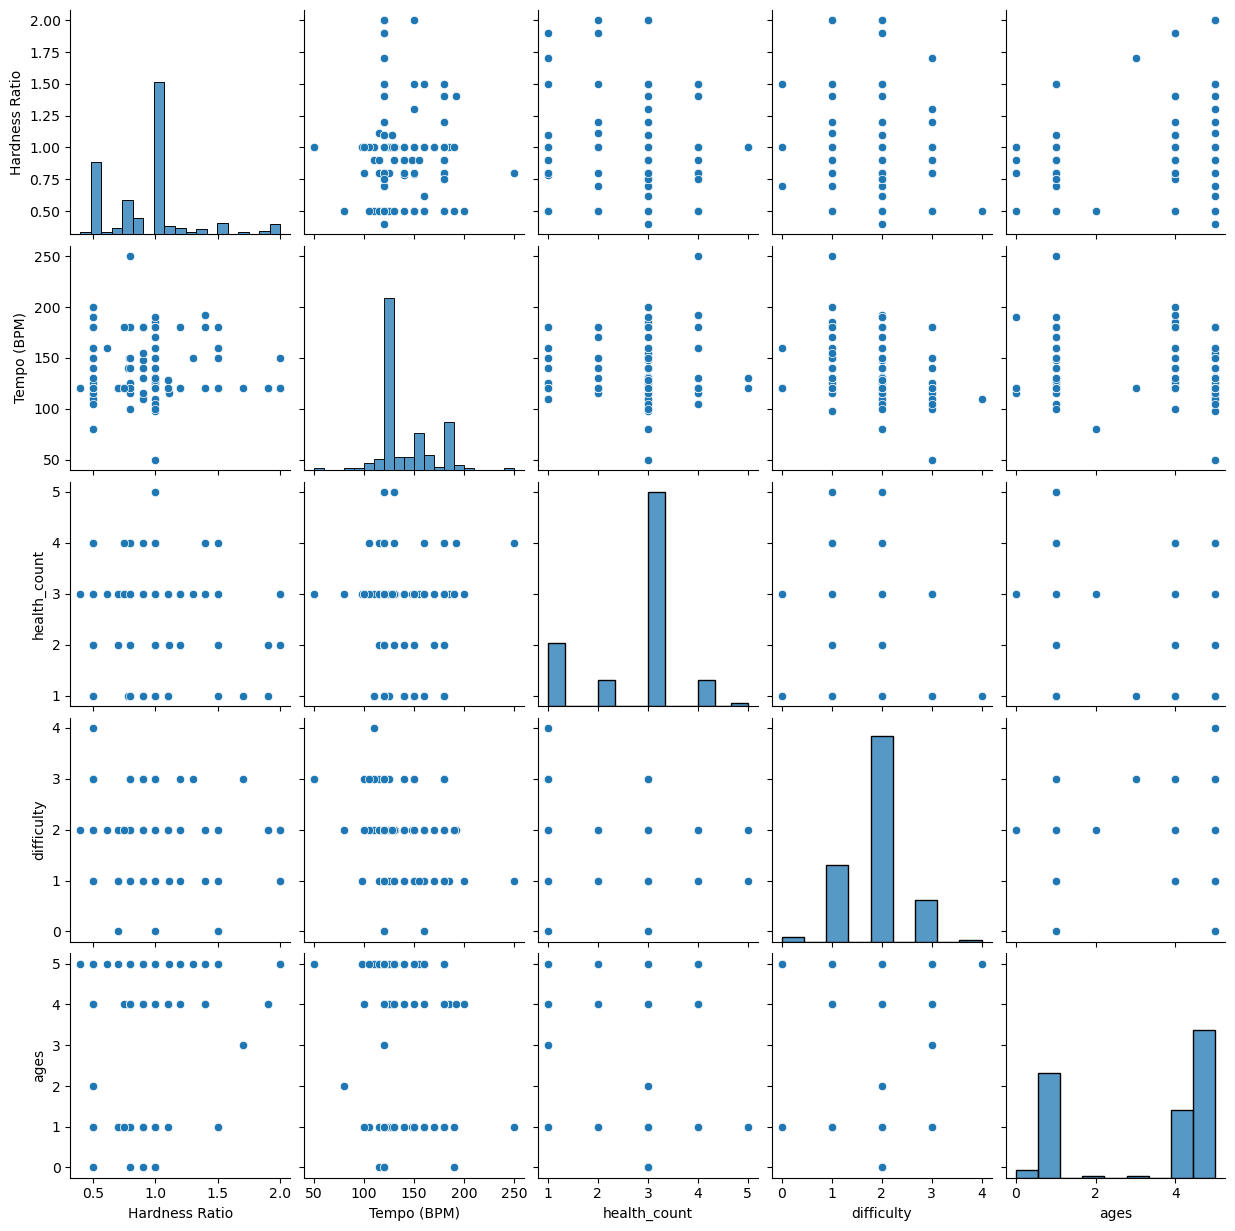

In [52]:
#EDA Step 3. Multivariate analysis - Use dimensionality reduction techniques (e.g., PCA) - Create pair plots or correlation matrices - Explore interactions between multiple variables
#Create pair plots or correlation matrices
#DANCE

#Pair Plots
sns.pairplot(df)

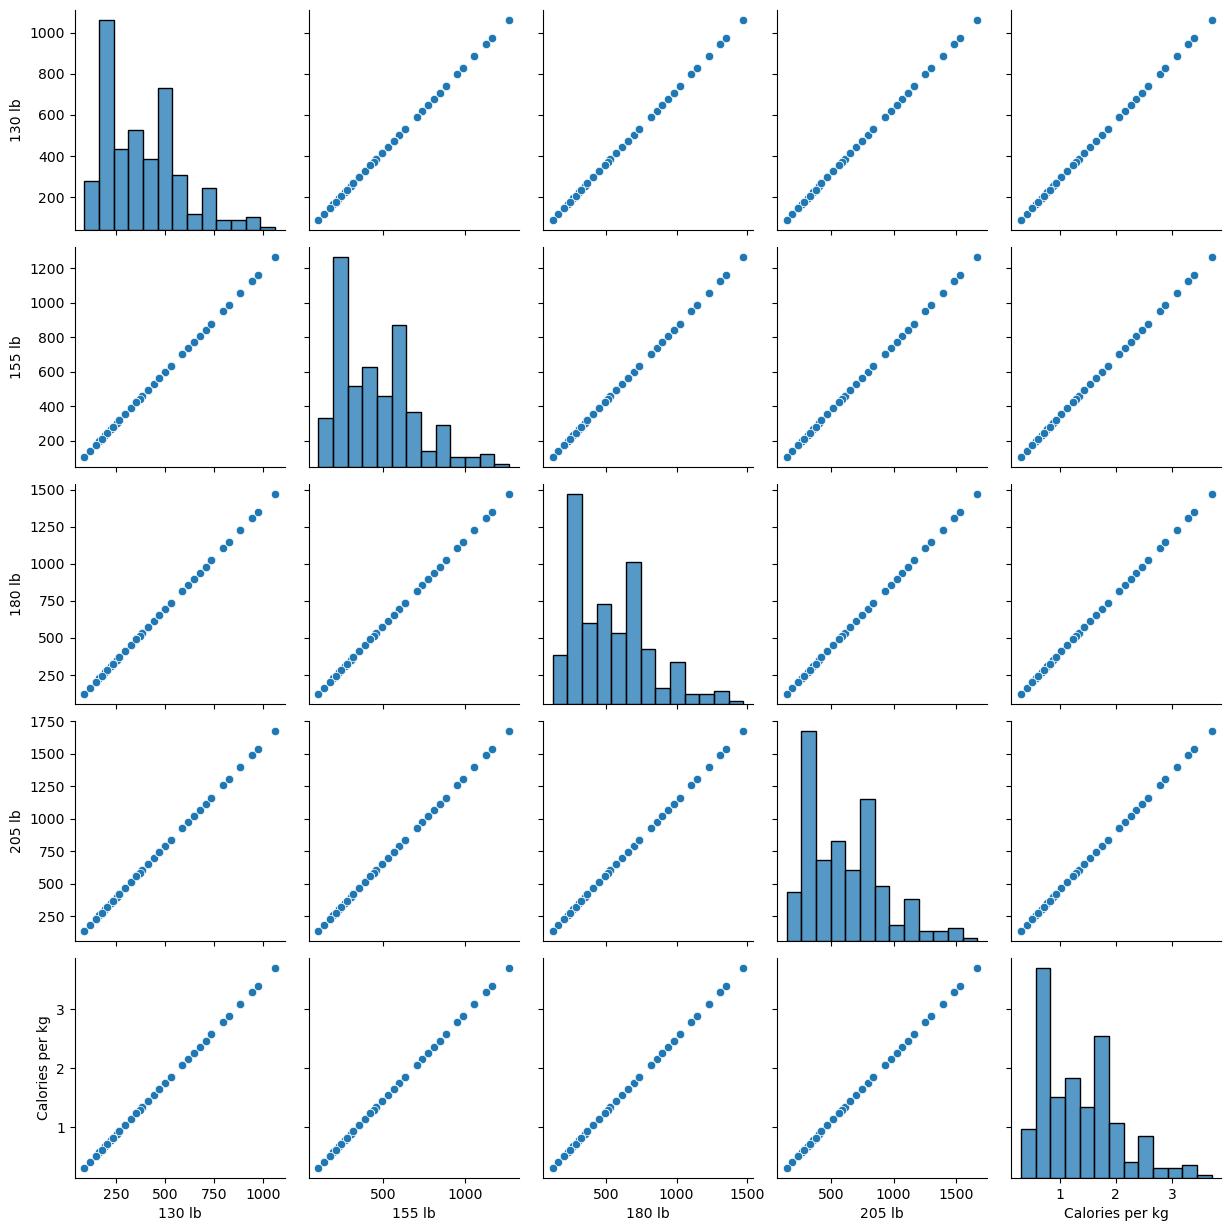

In [53]:
#EDA Step 3. Multivariate analysis - Use dimensionality reduction techniques (e.g., PCA) - Create pair plots or correlation matrices - Explore interactions between multiple variables
#Create pair plots or correlation matrices
#CALORIES

#Pair Plots
sns.pairplot(df2)

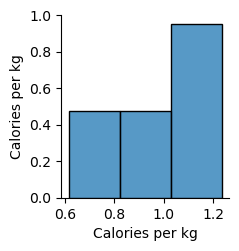

In [78]:
#EDA Step 3. Multivariate analysis - Use dimensionality reduction techniques (e.g., PCA) - Create pair plots or correlation matrices - Explore interactions between multiple variables
#Create pair plots or correlation matrices
#CALORIES
#D3

#Pair Plots
sns.pairplot(d3)

In [82]:
# EDA Step 5: Dimensionality assessment - Evaluate number of features vs. observations - Consider feature selection or extraction methods - Assess impact of high dimensionality on analysis
#Dimension reduction is a technique that reduces the number of variables in your data set, while preserving as much information as possible. 
#It can help you simplify your data, remove noise and redundancy, and highlight the most important features. 
#Dimension reduction can also improve the performance and accuracy of some machine learning models, as well as reduce the computational cost and storage space.

#DANCE
#PCA - Principal Component Analysis is a technique of feature extraction that maps a higher dimensional feature space to a lower-dimensional feature space.

from sklearn.preprocessing import StandardScaler  # to standardize the features
from sklearn.decomposition import PCA  # to apply PCA

#Standardize the features
#Create an object of StandardScaler which is present in sklearn.preprocessing
scalar = StandardScaler() 
scaled_data = pd.DataFrame(scalar.fit_transform(df[numeric_cols_df])) #scaling the data
scaled_data


,0,1,2,3,4
0,-0.681435,-0.631405,0.396113,-1.346738,-1.309808
1,-1.284596,-0.631405,0.396113,-1.346738,0.883854
2,-1.284596,-0.631405,0.396113,0.194529,-1.309808
3,0.223306,-0.441965,0.396113,0.194529,-1.309808
4,0.223306,1.641875,-1.809273,-1.346738,0.883854
...,...,...,...,...,...
201,0.223306,-0.252525,-0.706580,-1.346738,-1.309808
202,-1.284596,-2.146926,0.396113,0.194529,-0.761393
203,3.239111,0.505235,0.396113,0.194529,0.883854
204,1.128048,0.505235,0.396113,1.735796,0.883854


<Axes: >

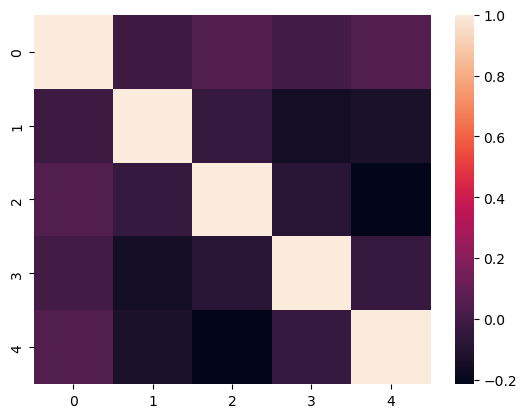

In [83]:
#Check the Co-relation between features without PCA
sns.heatmap(scaled_data.corr())

In [90]:
#Applying PCA
#Taking no. of Principal Components as 3
pca = PCA(n_components = 3)
pca.fit(scaled_data)
data_pca = pca.transform(scaled_data)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2','PC3'])
data_pca.head()

,PC1,PC2,PC3
0,1.269309,-0.117004,-0.234788
1,-0.064823,0.693206,-0.039413
2,0.755469,-0.862287,-1.355720
3,0.763306,-1.011585,-0.155581
4,-0.377863,2.795245,0.359910


<Axes: >

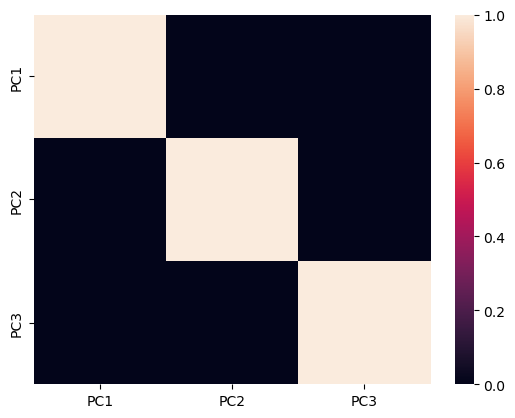

In [85]:
#Checking Co-relation between features after PCA
sns.heatmap(data_pca.corr())

'''
The above heatmap clearly depicts that there is no correlation between various obtained principal components (PC1, PC2, and PC3). Thus, we have moved from higher dimensional feature space to a lower-dimensional feature space while ensuring that there is no correlation between the so obtained PCs is minimum. Hence, we have accomplished the objectives of PCA.

Advantages of Principal Component Analysis (PCA):
For efficient working of ML models, our feature set needs to have features with no co-relation. After implementing the PCA on our dataset, all the Principal Components are independent – there is no correlation among them.
A Large number of feature sets lead to the issue of overfitting in models. PCA reduces the dimensions of the feature set – thereby reducing the chances of overfitting.
PCA helps us reduce the dimensions of our feature set; thus, the newly formed dataset comprising Principal Components need less disk/cloud space for storage while retaining maximum information.
'''

/var/folders/zz/3b4b_cj17rgb4t357254xqqc0000gp/T/ipykernel_6177/3390616726.py:12: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




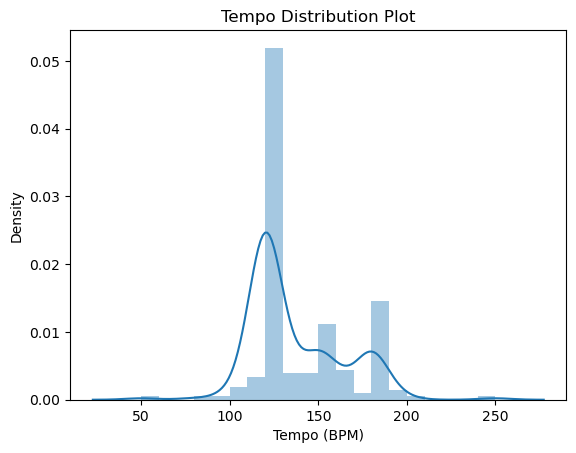

In [96]:
#EDA Step 6: Pattern and trend identification - Look for temporal trends in time series data - Identify seasonal patterns - Detect clusters or groupings in the data

#Regression analysis - These strategies can assist in identifying correlations between distinct variables in data as well as trends over time.
# - Goal: Regression analysis to understand the relationship between the tempo and health benefits and how they influence difficulty in dances and calories burned

#y = mx+c

from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression
plt.title('Tempo Distribution Plot')
sns.distplot(df['Tempo (BPM)'])
#sns.distplot(df['health_count'])
plt.show()


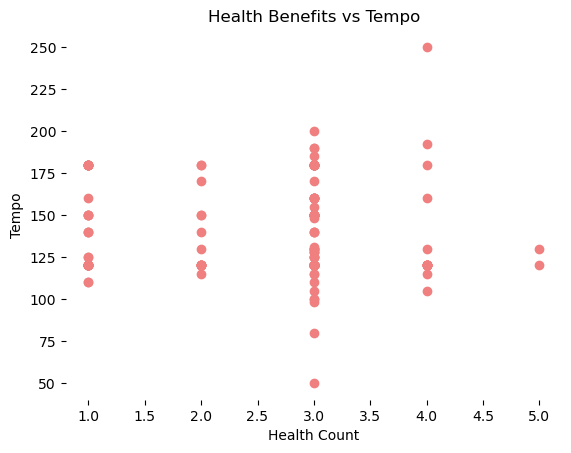

In [97]:
# Relationship between Salary and Experience
plt.scatter(df['health_count'], df['Tempo (BPM)'], color = 'lightcoral')
plt.title('Health Benefits vs Tempo')
plt.xlabel('Health Count')
plt.ylabel('Tempo')
plt.box(False)
plt.show()

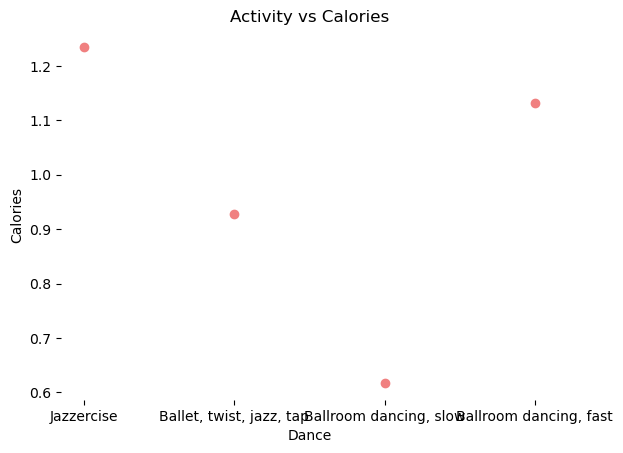

In [98]:
#D3

plt.scatter(d3['Activity, Exercise or Sport (1 hour)'], d3['Calories per kg'], color = 'lightcoral')
plt.title('Activity vs Calories')
plt.xlabel('Dance')
plt.ylabel('Calories')
plt.box(False)
plt.show()

#could be represented as a negative correlation

In [100]:
#Dance - independent 
#Calories - dependent
#CANNOT DO LINEAR REGRESSION ON D3- EDITED CALORIES DATASET - BECAUSE THE ACITVITY VAR IS TEXT

# Splitting variables
x = d3.iloc[:, :1]  # independent - dance
y = d3.iloc[:, 1:]  # dependent - calories

#Further, split your data into training (80%) and test (20%) sets using train_test_split
# Splitting dataset into test/train
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
#Train the regression model
#Regressor model
regressor = LinearRegression()
regressor.fit(X_train, y_train)
#Prediction result
y_pred_test = regressor.predict(X_test)     # predicted value of y_test
y_pred_train = regressor.predict(X_train)   # predicted value of y_train
#Plot prediction on training set
plt.scatter(X_train, y_train, color = 'lightcoral')
plt.plot(X_train, y_pred_train, color = 'firebrick')
plt.title('Dance vs Calories (Training Set)')
plt.xlabel('Dance')
plt.ylabel('Calories')
plt.legend(['X_train/Pred(y_test)', 'X_train/y_train'], title = 'Sal/Exp', loc='best', facecolor='white')
plt.box(False)
plt.show()


ValueError: could not convert string to float: 'Ballroom dancing, fast'

In [ ]:
# EDA Step 7: Hypothesis generation - Formulate potential relationships between variables - Develop questions for further investigation - Identify areas for more detailed statistical analysis

#Conclusion

| Phase | Step | Key Activities |
|-------|------|----------------|
| IDA | 1. Data collection and importation | - Gather data from various sources<br>- Import data into analysis environment (e.g., Python, R) |
| IDA | 2. Data cleaning and preprocessing | - Handle missing values<br>- Remove duplicates<br>- Correct data types<br>- Standardize formats |
| IDA | 3. Variable identification and classification | - Identify dependent and independent variables<br>- Classify variables (numeric, categorical, etc.)<br>- Understand the meaning of each variable |
| IDA | 4. Basic descriptive statistics | - Calculate mean, median, mode<br>- Determine range, variance, standard deviation<br>- Identify minimum and maximum values |
| IDA | 5. Data quality assessment | - Check for inconsistencies<br>- Verify data accuracy<br>- Assess data completeness |
| IDA | 6. Missing data analysis | - Quantify missing data<br>- Identify patterns in missing data<br>- Decide on imputation strategy if necessary |
| IDA | 7. Outlier detection | - Identify potential outliers<br>- Assess impact of outliers<br>- Decide on treatment of outliers |
| EDA | 1. Univariate analysis | - Create histograms, box plots for numeric variables<br>- Generate bar charts for categorical variables<br>- Calculate summary statistics |
| EDA | 2. Bivariate analysis | - Create scatter plots<br>- Perform cross-tabulations<br>- Calculate correlations between pairs of variables |
| EDA | 3. Multivariate analysis | - Use dimensionality reduction techniques (e.g., PCA)<br>- Create pair plots or correlation matrices<br>- Explore interactions between multiple variables |
| EDA | 4. Correlation analysis | - Calculate correlation coefficients<br>- Create correlation heatmaps<br>- Identify strongly correlated variables |
| EDA | 5. Dimensionality assessment | - Evaluate number of features vs. observations<br>- Consider feature selection or extraction methods<br>- Assess impact of high dimensionality on analysis |
| EDA | 6. Pattern and trend identification | - Look for temporal trends in time series data<br>- Identify seasonal patterns<br>- Detect clusters or groupings in the data |
| EDA | 7. Hypothesis generation | - Formulate potential relationships between variables<br>- Develop questions for further investigation<br>- Identify areas for more detailed statistical analysis |

Note: The boundary between IDA and EDA can be fluid, and some activities may overlap or be performed iteratively throughout the analysis process.